# Flipkart Product Sales Data Exploration with SQL


### Objective: 
##### The project aims to analyze Flipkart sales data using SQL, identifying popular and expensive products through visual charts. It makes the findings easily understandable, showcasing the current relevance of SQL for data analysis and emphasizing the importance of data visualization. 

### Importing Necessary Libraries

In [25]:
# sqlite3 is used for connecting mysql database with jupyter notebook using python
import sqlite3 as sql

# Importing pandas for displaying data in tabular format
import pandas as pd

# Importing visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')
%matplotlib inline

# Set the margins
mpl.rcParams['axes.xmargin'] = 0.09
mpl.rcParams['axes.ymargin'] = 0.09

# Set figsize
sns.set(rc={'figure.figsize':(22,7)})

# Importing the warnings library to ignore the warnings displayed in Jupyter Notebook
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)


Pandas library is used to display the data in tabular format, as the SQL connector retrieves data in list and tuples. 
(I will not be using pandas for any kind of exploratory data analysis and transformation as I want the analysis to be specific SQL only.)


### Creating the Database and Table

In [26]:
# Reading csv file
sales = pd.read_csv("Flipkart Sales Dataset.csv")

In [27]:
#Create the database connection
connection = sql.connect('flipkart_sales.db')

# Creating cursor object for executing sql queries
cursor = connection.cursor()

In [28]:
# Insert data into database
sales.to_sql('sales', connection, if_exists='replace', index=False)

12041

#### Conclusion: There are a total of 12041 rows in the sales table.

In [29]:
# Displaying table name in database
cursor.execute('''select name from sqlite_master where type = 'table';''')
print("The name of table:")
table_list=[table[0] for table in cursor.fetchall()]
table_list

The name of table:


['sales']

### Exploring the Data

In [30]:
# Retreive first 5 rows and last 5 rows from the table
query = 'SELECT * FROM  sales'

df = pd.read_sql_query(query, connection)
df

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1615.0,4000.0,I2SERVICES,4.4,None,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,152.0,600.0,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,59.0,199.0,VictoryOutlets,4.7,None,Cricket Rubber Ball Weight: 110 g
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,75.0,299.0,VictoryOutlets,4.7,None,Cricket Synthetic Ball Weight: 110 g
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,329.0,1399.0,IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...
...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,380.0,999.0,Twins enterprises,3.9,Wall Hanging Fish Bowl with Free Stones\nHigh ...,None
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,179.0,299.0,Nitishree pets,4.4,aquarium substrate can add a great contrast in...,Type: Sand Used For Salt Water and Fresh Water...
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,354.0,600.0,AquaxPetProducts,4.9,Taiyo Turtle Food 1Kg Suitable for your Turtle...,For Turtle Flavor: Chicken Food Type: Dry Suit...
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,498.0,599.0,Foodie Puppies Group,4.5,None,For Fish Flavor: NA Food Type: Dry Suitable Fo...


### Retrieve Column Names from Sales Table

In [31]:
# Execute a query to retrieve the column names
table_name = 'sales'
cursor.execute(f"PRAGMA table_info({table_name})")
columns = cursor.fetchall()

In [32]:
# Get the total number of columns
total_columns = len(columns)

# Print or use the total number of columns
print(f"Total number of columns in {table_name}: {total_columns}")

# Create a DataFrame from the results
column_df = pd.DataFrame(columns, columns=["ColumnIndex", "ColumnName", "ColumnType", "NotNull", "DefaultValue", "PrimaryKey"])

# Display the DataFrame
print(f"Columns of {table_name} table:")
column_df

Total number of columns in sales: 11
Columns of sales table:


,ColumnIndex,ColumnName,ColumnType,NotNull,DefaultValue,PrimaryKey
0,0,category_1,TEXT,0,None,0
1,1,category_2,TEXT,0,None,0
2,2,category_3,TEXT,0,None,0
3,3,title,TEXT,0,None,0
4,4,product_rating,REAL,0,None,0
5,5,selling_price,REAL,0,None,0
6,6,mrp,REAL,0,None,0
7,7,seller_name,TEXT,0,None,0
8,8,seller_rating,REAL,0,None,0
9,9,description,TEXT,0,None,0


#### Conclusion: There are 11 columns in sales table.

### Info of Table Columns

* (category1, category2, category 3 : Specifies the division in which the data belongs as per the website).
* category_1 : main category of the product.
* category_2 : sub category of the product.
* category_3 : product type.
* title : title of the product.
* product_rating : rating of product which is given by customers.
* selling_price : selling price on which the product is sold.
* mrp : Maximum Ratail Price of the product.
* seller_name : name of the business selling the product.
* seller_rating : rating of the seller given by the customers.
* description : desciption of the product.
* highlights : highlights of the product.

__Note : Product rating and seller rating are two different things as product rating will be different for each product but if seller sells multiple products then overall rating of all product will be seller rating. So there are two separate columns for ratings in the table.__

In [33]:
# Retreive first 2 rows from table
pd.read_sql_query('select * from sales limit 2', connection)

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1615.0,4000.0,I2SERVICES,4.4,None,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,152.0,600.0,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...


The columns category_1, category_2, and category_3 is renamed to make them seem more obvious and make it easier to understand the meaning of the data stored in them. The current names are a little confusing because they don't explain or represent what they mean.
* category_1 &rarr; Main Category
* category_2 &rarr; Sub Category
* category_3 &rarr; Product Type
* title &rarr; Product Name

In [34]:
# Renaming the column names
cursor.execute("ALTER TABLE sales RENAME COLUMN category_1 TO main_category;")
cursor.execute("ALTER TABLE sales RENAME COLUMN category_2 TO sub_category;")
cursor.execute("ALTER TABLE sales RENAME COLUMN category_3 TO product_type;")
cursor.execute("ALTER TABLE sales RENAME COLUMN title TO product_name;")
connection.commit()

In [35]:
# Retreive first 5 rows from table
pd.read_sql_query('select * from sales limit 5', connection)

,main_category,sub_category,product_type,product_name,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1615.0,4000.0,I2SERVICES,4.4,None,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,152.0,600.0,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,59.0,199.0,VictoryOutlets,4.7,None,Cricket Rubber Ball Weight: 110 g
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,75.0,299.0,VictoryOutlets,4.7,None,Cricket Synthetic Ball Weight: 110 g
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,329.0,1399.0,IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...


We can now clearly understand the data that each column stores by simply glancing at its name.

### Distribution of Null Values in each Column

In [36]:
# Create list to store column names and null value counts
column_names = []
null_counts = []

# Get column names from the table
columns_query = f"PRAGMA table_info({table_name})"
cursor.execute(columns_query)
columns_info = cursor.fetchall()

# Loop through each column
for column_info in columns_info:
    column_name = column_info[1]  # Column name is at index 1 in the PRAGMA result
    query = f"""SELECT COUNT(*) AS null_count
                FROM {table_name}
                WHERE {column_name} IS NULL;"""
    
    cursor.execute(query)
    res = cursor.fetchone()
    if res is not None :
        print(f"Total null values in {column_name}: {res[0]}\n")
        column_names.append(column_name)
        null_counts.append(res[0])


Total null values in main_category: 0

Total null values in sub_category: 0

Total null values in product_type: 0

Total null values in product_name: 18

Total null values in product_rating: 80

Total null values in selling_price: 28

Total null values in mrp: 375

Total null values in seller_name: 216

Total null values in seller_rating: 214

Total null values in description: 7020

Total null values in highlights: 5481



Here we will use pandas to sort the data in descending order and to visualize it using a barplot. Sorting list components is not a smart idea because doing so will cause the column names to become jumbled. Instead, we can use pandas to sort the values in descending order along with the column names.

In [37]:
# Creating pandas dataframe objects using list 
df_null_count = pd.DataFrame({'column_names':column_names, 'null_count':null_counts}).sort_values('null_count', ascending=False)
df_null_count

,column_names,null_count
9,description,7020
10,highlights,5481
6,mrp,375
7,seller_name,216
8,seller_rating,214
4,product_rating,80
5,selling_price,28
3,product_name,18
0,main_category,0
1,sub_category,0


In [38]:
# Set the margins
mpl.rcParams['axes.xmargin'] = 0.09
mpl.rcParams['axes.ymargin'] = 0.09

# Set figsize
sns.set(rc={'figure.figsize':(22,7)})

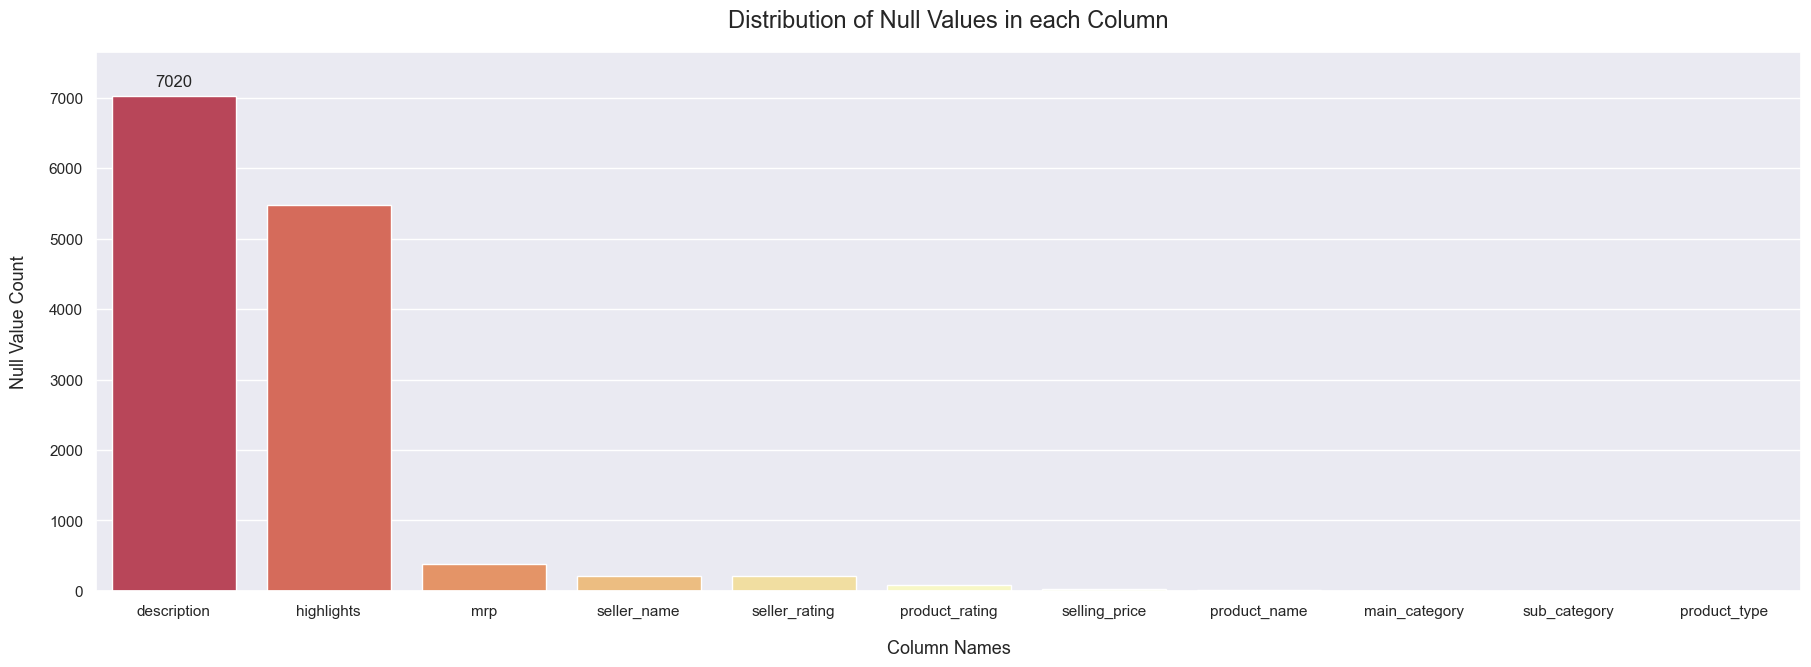

In [39]:
# Visualizing the distribution of null values using Seaborn's barplot
ax = sns.barplot(x='column_names', y='null_count', data=df_null_count, ci=None, palette="Spectral")
ax.set_title('Distribution of Null Values in each Column', fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Null Value Count', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Column Names', labelpad=15, fontdict={'size':13})
plt.show()

#### Conclusion:
* A few columns, including the product name, product rating, selling price, mrp, seller name, seller rating, description, and highlights column, have null values.
* Out of all the 12041 entries, the description column has the greatest null values, around 7020. The highlights column has 5481 null values, which come in second.




### Distribution of Unique Values in each Column

In [40]:
# Lists to store column names and unique value counts
column_names1 = []
unique_counts = []

# Get column names from the table
columns_query = f"PRAGMA table_info({table_name})"
cursor.execute(columns_query)
columns_info = cursor.fetchall()

# Loop through each column
for column_info in columns_info:
    column_name = column_info[1]  # Column name is at index 1 in the PRAGMA result
    query = f"""SELECT COUNT(DISTINCT {column_name}) AS distinct_count
                FROM {table_name}
                WHERE {column_name} IS NOT NULL;"""
    
    cursor.execute(query)
    res = cursor.fetchone()
    if res is not None:
        print(f"Total unique values in {column_name}: {res[0]}\n")
        column_names1.append(column_name)
        unique_counts.append(res[0])


Total unique values in main_category: 6

Total unique values in sub_category: 77

Total unique values in product_type: 300

Total unique values in product_name: 10484

Total unique values in product_rating: 33

Total unique values in selling_price: 1816

Total unique values in mrp: 1414

Total unique values in seller_name: 3317

Total unique values in seller_rating: 21

Total unique values in description: 4095

Total unique values in highlights: 5023



In [41]:
# Creating pandas dataframe objects using list 
df_unique_count = pd.DataFrame({'column_names':column_names1, 'unique_count':unique_counts}).sort_values('unique_count', ascending=False)
df_unique_count

,column_names,unique_count
3,product_name,10484
10,highlights,5023
9,description,4095
7,seller_name,3317
5,selling_price,1816
6,mrp,1414
2,product_type,300
1,sub_category,77
4,product_rating,33
8,seller_rating,21


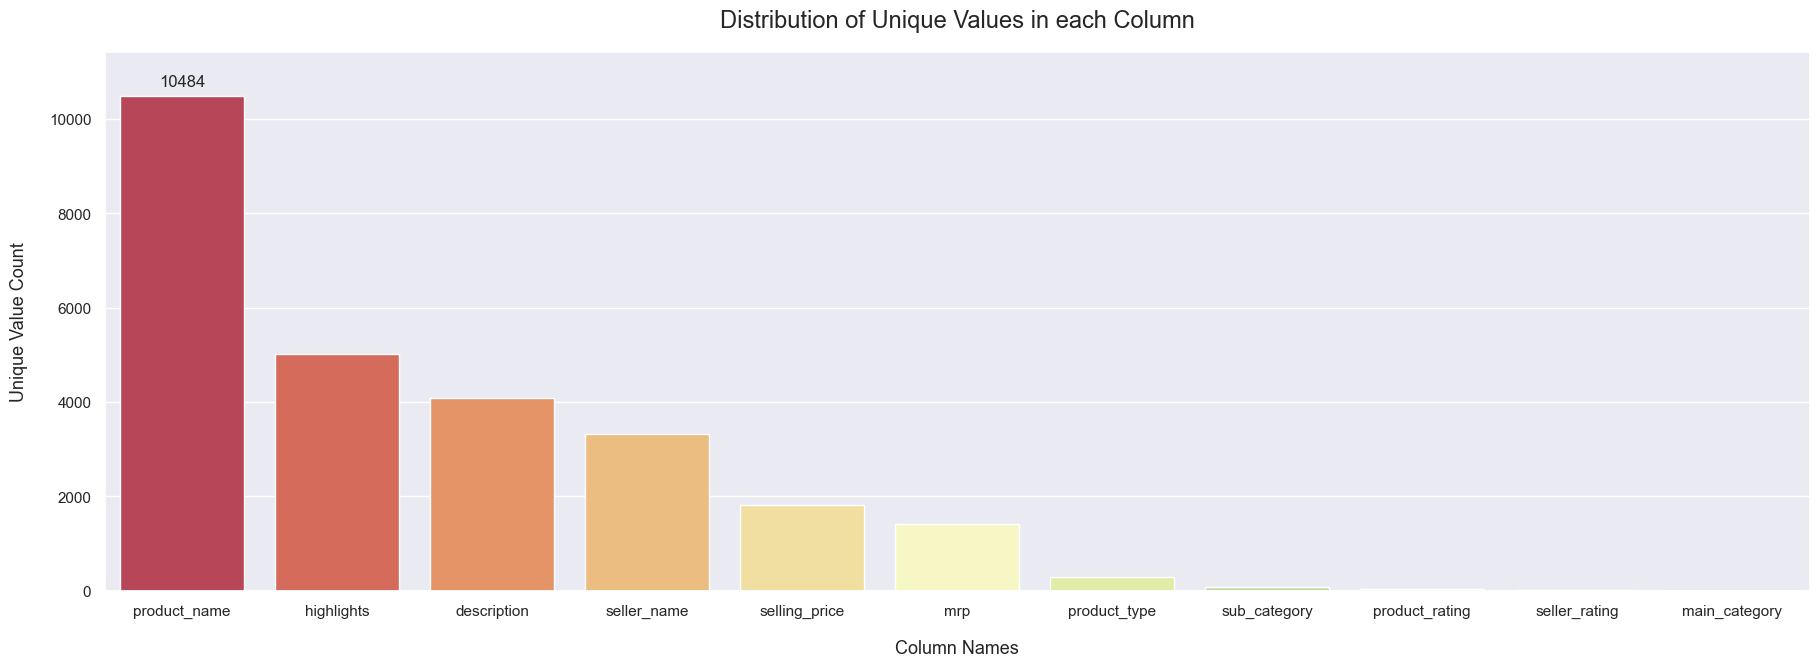

In [42]:
# Let's visualize the distribution of unique values using Seaborn's barplot
ax = sns.barplot(x='column_names', y='unique_count', data=df_unique_count, ci=None, palette="Spectral")
ax.set_title('Distribution of Unique Values in each Column', fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Unique Value Count', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Column Names', labelpad=15, fontdict={'size':13})
plt.show()

#### Conclusion:
* The product name has the most unique values (10478), which are followed by the columns highlights, description, and seller name.
* The data includes 6 main product categories, 76 sub categories and 300 product types and 10478 products with 3317 unique sellers and 1816 different price variations.

### Distribution of Units Sold in Main Category of Product

In [43]:
# Compute the units sold in the main category of the product
query = """ Select distinct(main_category),
            count(main_category) as units_sold
            from sales
            group by main_category
            order by units_sold desc;"""

df_main_category = pd.read_sql_query(query, connection)
df_main_category

,main_category,units_sold
0,Women's wear,2422
1,Men's wear,2360
2,Bady and Kids,2338
3,Home and Furniture,2120
4,"Sports, Books and More",1820
5,Electronics,981


Note : There is a spelling mistake in main category. Instead of baby and kids it is written as bady and kids.

In [44]:
# Correcting the spelling mistake for Baby and Kids category
query = """ UPDATE sales    
            SET main_category = 'Baby and Kids'    
            WHERE main_category = 'Bady and Kids'; """

cursor.execute(query)
connection.commit()

In [45]:
# Compute the units sold in the main category of the product
query = """ Select distinct(main_category),
            count(main_category) as units_sold
            from sales
            group by main_category
            order by units_sold desc;"""

df_main_category = pd.read_sql_query(query, connection)
df_main_category

,main_category,units_sold
0,Women's wear,2422
1,Men's wear,2360
2,Baby and Kids,2338
3,Home and Furniture,2120
4,"Sports, Books and More",1820
5,Electronics,981


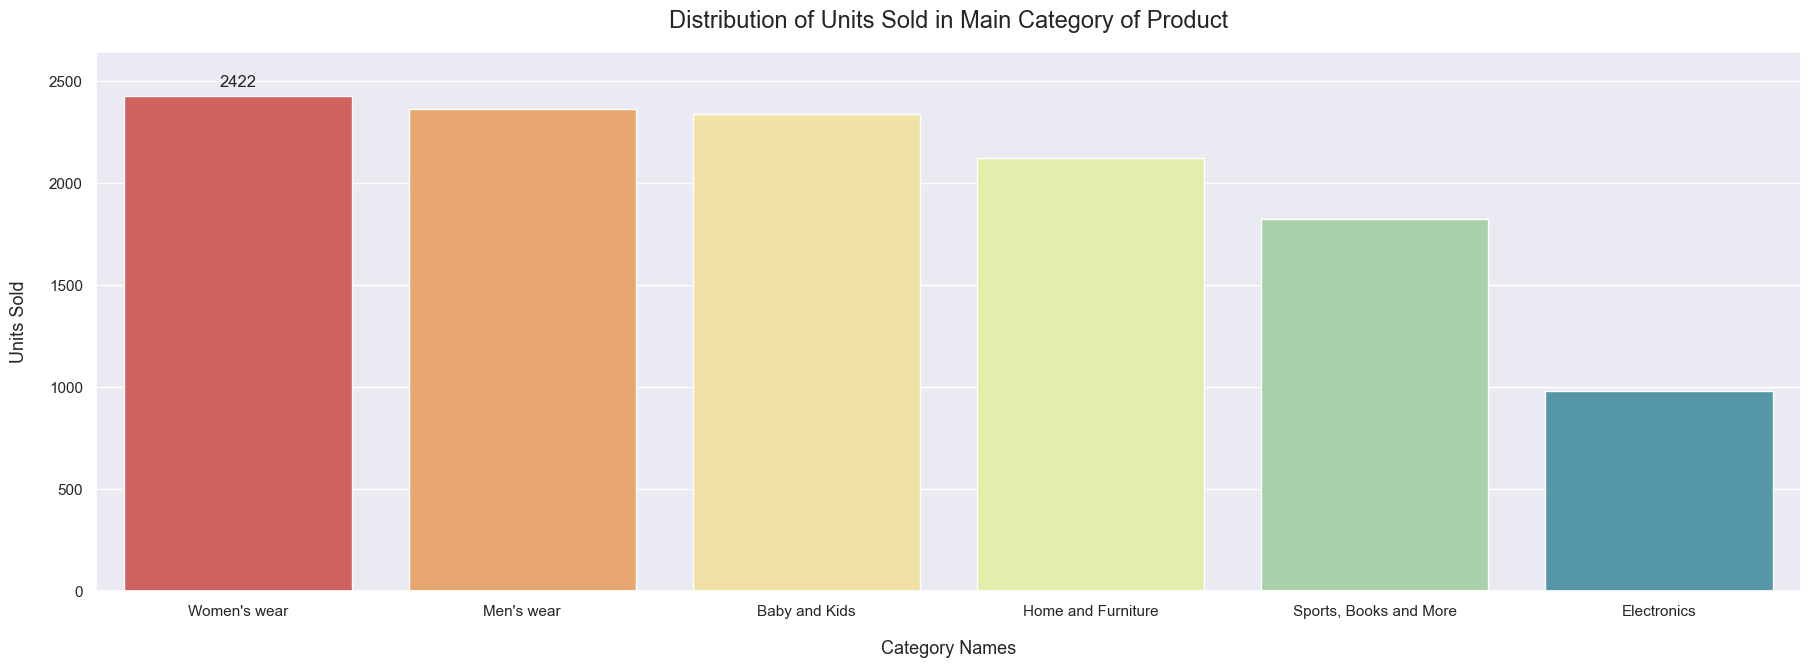

In [46]:
# Visualize the distribution of units sold in the main category of the product
ax = sns.barplot(x ='main_category', y='units_sold', data=df_main_category, ci=None, palette="Spectral")
ax.set_title('Distribution of Units Sold in Main Category of Product', fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Units Sold', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Category Names', labelpad=15, fontdict={'size':13})
plt.show()

#### Conclusion:
* There are 6 main unique categories of product in the data.
* Around 2422, the category with the highest sales volume is women's clothes, followed by men's clothing and infant & kids.


### Distribution of Units Sold in Subcategories of Product

In [47]:
# Compute the units sold in sub-category of product
query = """ Select distinct(sub_category),
            count(sub_category) as units_sold
            from sales
            where sub_category is not Null
            group by sub_category
            order by units_sold desc; """

df_category2 = pd.read_sql_query(query, connection)
df_category2

,sub_category,units_sold
0,Baby Care,640
1,Accessories,600
2,Ethnic Wear,560
3,Toys,458
4,Foot Wear,360
...,...,...
72,Desktop PCs,24
73,Computer Peripherals,18
74,Cameras,10
75,Tablets,5


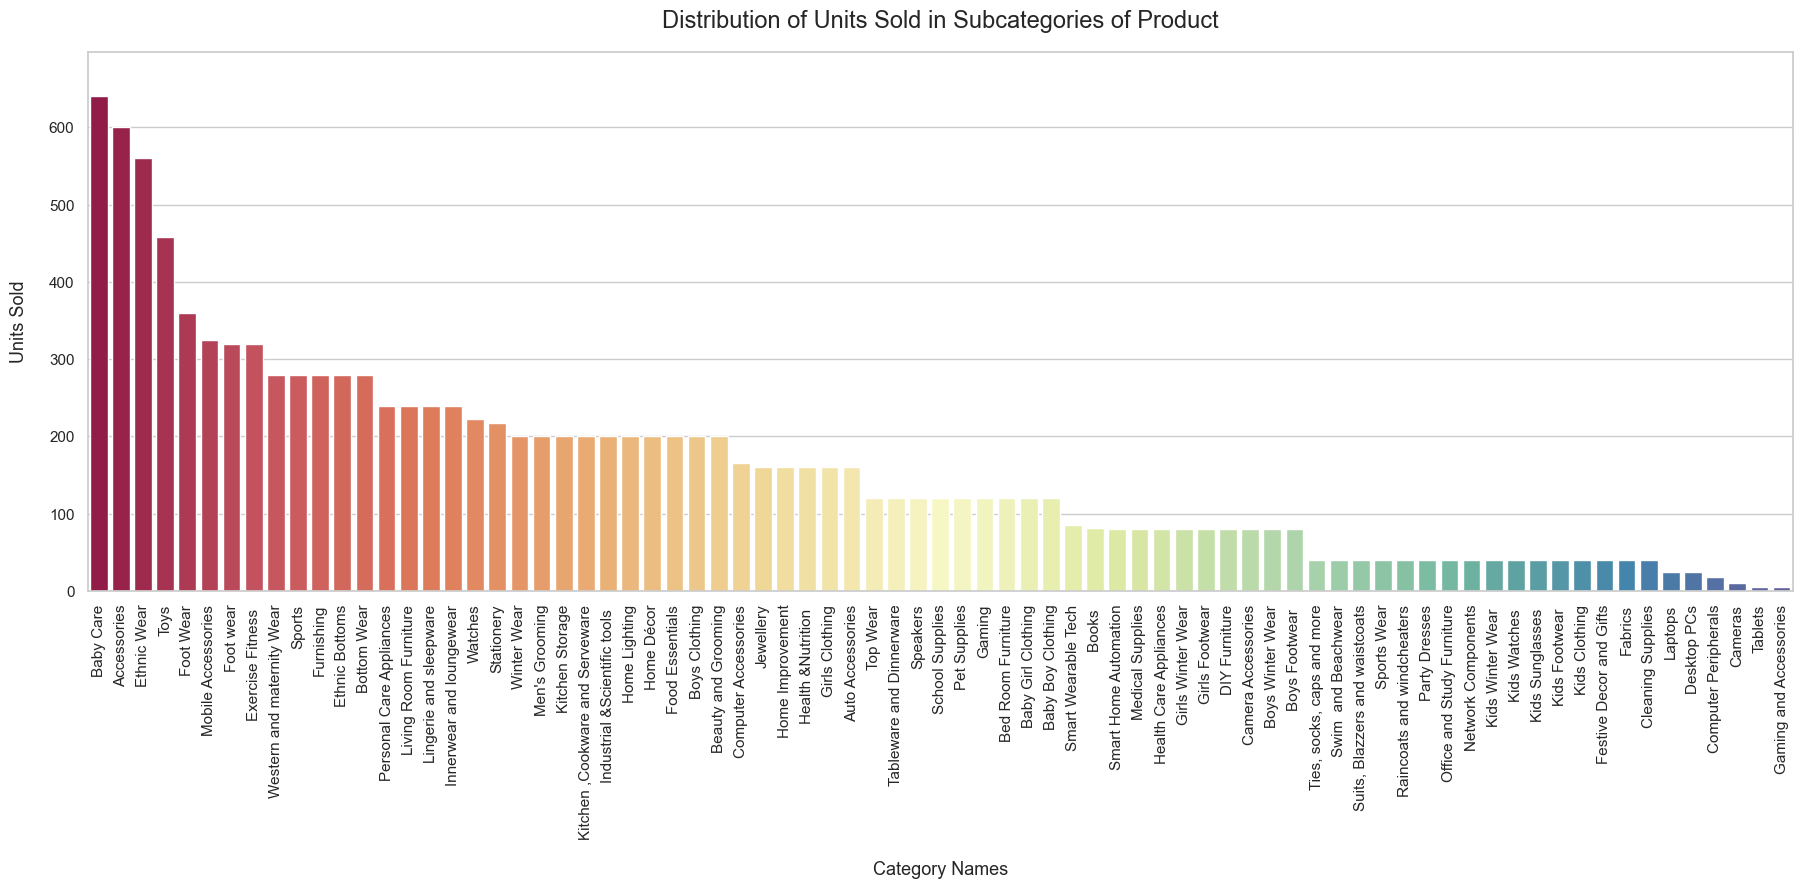

In [88]:
# Visualize the distribution of units sold across product subcategories
ax = sns.barplot(x ='sub_category', y='units_sold', data=df_category2, ci=None, palette="Spectral")
ax.set_title("Distribution of Units Sold in Subcategories of Product", fontdict={'size':17}, y=1.03)
plt.xticks(rotation=90)
ax.set_ylabel('Units Sold', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Category Names', labelpad=15, fontdict={'size':13})
plt.show()

#### Conclusion:
* There are 76 product subcategories in the data.

* The baby care category accounts for approximately 640 units sold, with accessories, and ethnic apparel following closely behind.



### Distribution of Units Sold by Product Type

In [49]:
# Compute the distribution of units sold by product type
query = """ Select distinct(product_type),
            count(product_type) as units_sold
            from sales
            where product_type is not Null
            group by product_type
            order by units_sold desc
            limit 50;"""

df_category3 = pd.read_sql_query(query, connection)
df_category3

,product_type,units_sold
0,Innerwear,160
1,T -Shirts,120
2,Shorts,120
3,Sunglasses,80
4,Sports Shoes,80
5,Sport Shoes,80
6,Luggage and Travel,80
7,Jeans,80
8,Ethnic Wear,80
9,Casual Shoes,80


Since, there are too many different product kinds and we have already visualized the primary and subcategories, it is not a good idea to display every product type. Alternatively, we can view the top 50 product categories.

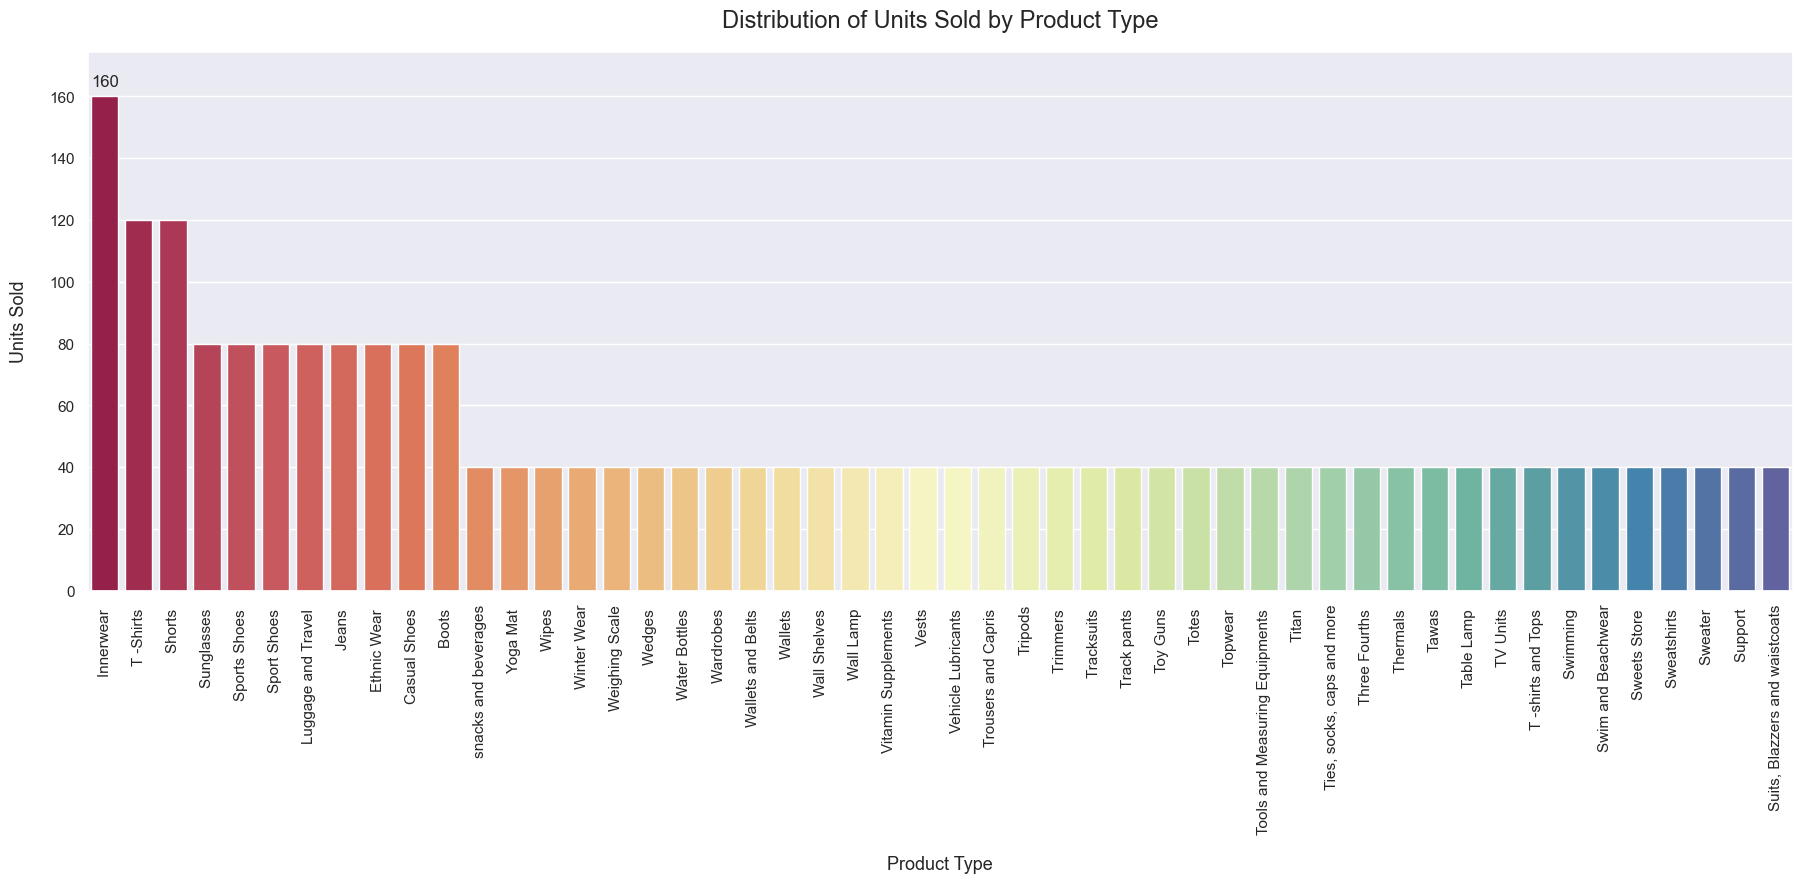

In [50]:
# visualize the distribution of units sold by product type
ax = sns.barplot(x ='product_type', y='units_sold', data=df_category3, ci=None, palette="Spectral")
ax.set_title("Distribution of Units Sold by Product Type", fontdict={'size':17}, y=1.03)
plt.xticks(rotation=90)
ax.set_ylabel('Units Sold', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Product Type', labelpad=15, fontdict={'size':13})
ax.bar_label(ax.containers[0], padding=5)
plt.show()

#### Conclusion:
* The data contains about 300 distinct product type categories.
* Roughly 160 products fall within the innerwear category, 120 products fall on the t-shirts and shorts categories and so on.



### Distribution of Selling Price

In [51]:
# Compute distribution of selling price
query = """ select distinct(selling_price) as selling_price,
            count(selling_price) as units_sold
            from sales
            where selling_price is not Null
            group by selling_price
            order by selling_price;"""

df_selling_price = pd.read_sql_query(query, connection)
df_selling_price

,selling_price,units_sold
0,10.0,1
1,51.0,2
2,59.0,3
3,62.0,1
4,63.0,1
...,...,...
1811,154890.0,1
1812,180990.0,1
1813,189990.0,1
1814,199690.0,1


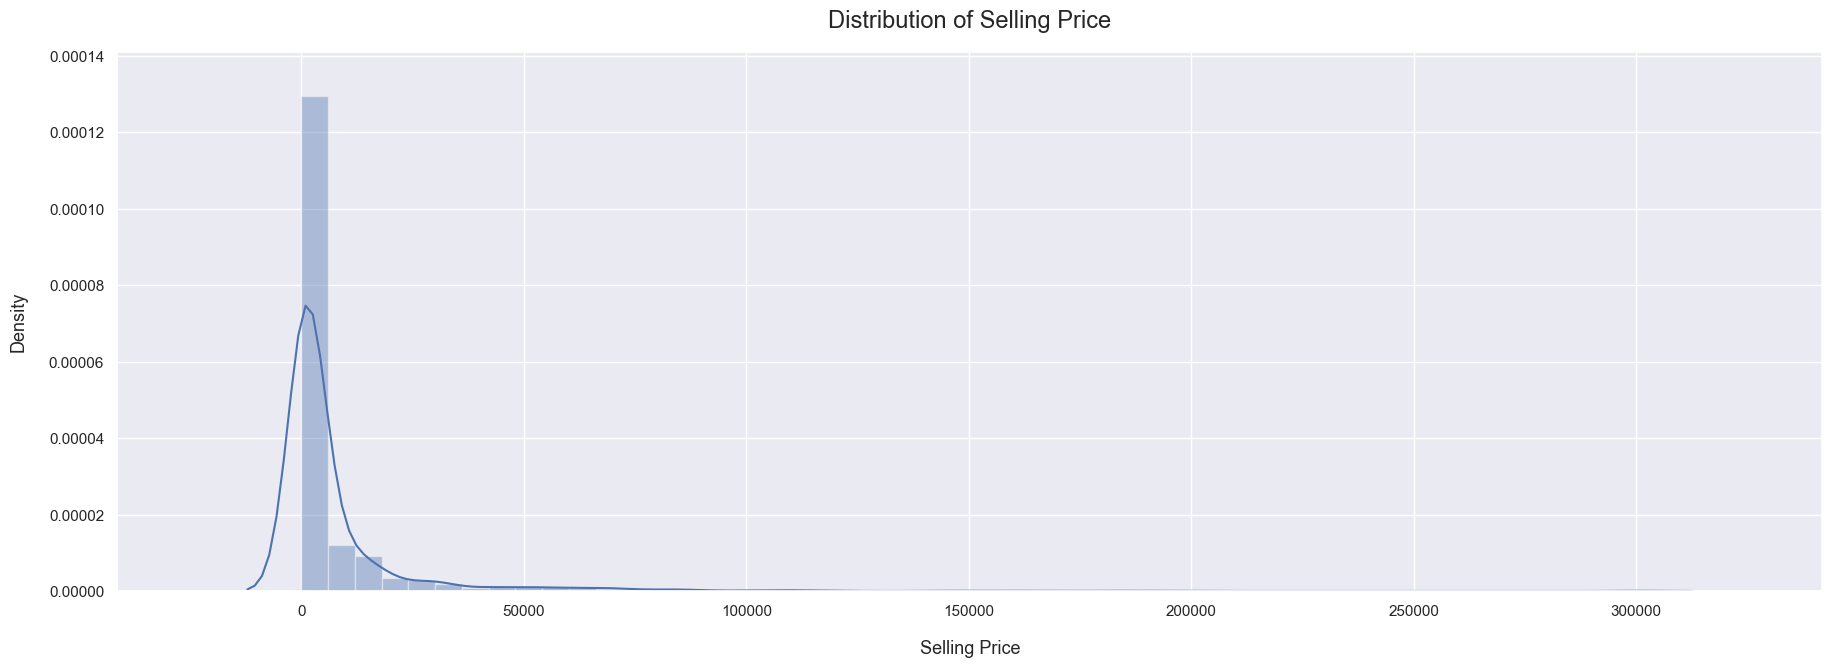

In [52]:
# Visualize the distribution of selling price
import matplotlib.ticker as ticker
ax = sns.distplot(df_selling_price['selling_price'])
ax.set_title('Distribution of Selling Price', fontdict={'size':17}, y=1.03)
ax.set_ylabel('Density', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Selling Price', labelpad=15, fontdict={'size':13})
formatter = ticker.ScalarFormatter() # create a ScalarFormatter object
ax.xaxis.set_major_formatter(formatter) # apply the formatter to the x-axis ticks
ax.yaxis.set_major_formatter(formatter) # apply the formatter to the y-axis ticks
plt.show()

#### Conclusion:
* Selling price ranges from Rs.10.0 to Rs.300490.0.
* There are 1816 unique price amounts for different products in the data.
* Most units sold are priced at Rs.299.0 approximately 498 units, followed by products priced at Rs.499.0 and Rs.399.0.
* Total 1754 products have been sold which are below Rs.50000. And only 62 products were sold above the selling price of Rs.50000.
* Only one unit is sold for the product whose minimum price is Rs.10.0 and one unit is sold whose price is Rs.300490.


### Distribution of MRP

In [53]:
# Compute the distribution of mrp
query = """ select distinct(mrp) as mrp,
            count(mrp) as units_sold
            from sales
            where mrp is not Null
            group by mrp
            order by mrp;"""

df_mrp = pd.read_sql_query(query, connection)
df_mrp

,mrp,units_sold
0,65.0,2
1,70.0,1
2,75.0,1
3,79.0,1
4,80.0,1
...,...,...
1409,188900.0,1
1410,190400.0,1
1411,229490.0,1
1412,287304.0,1


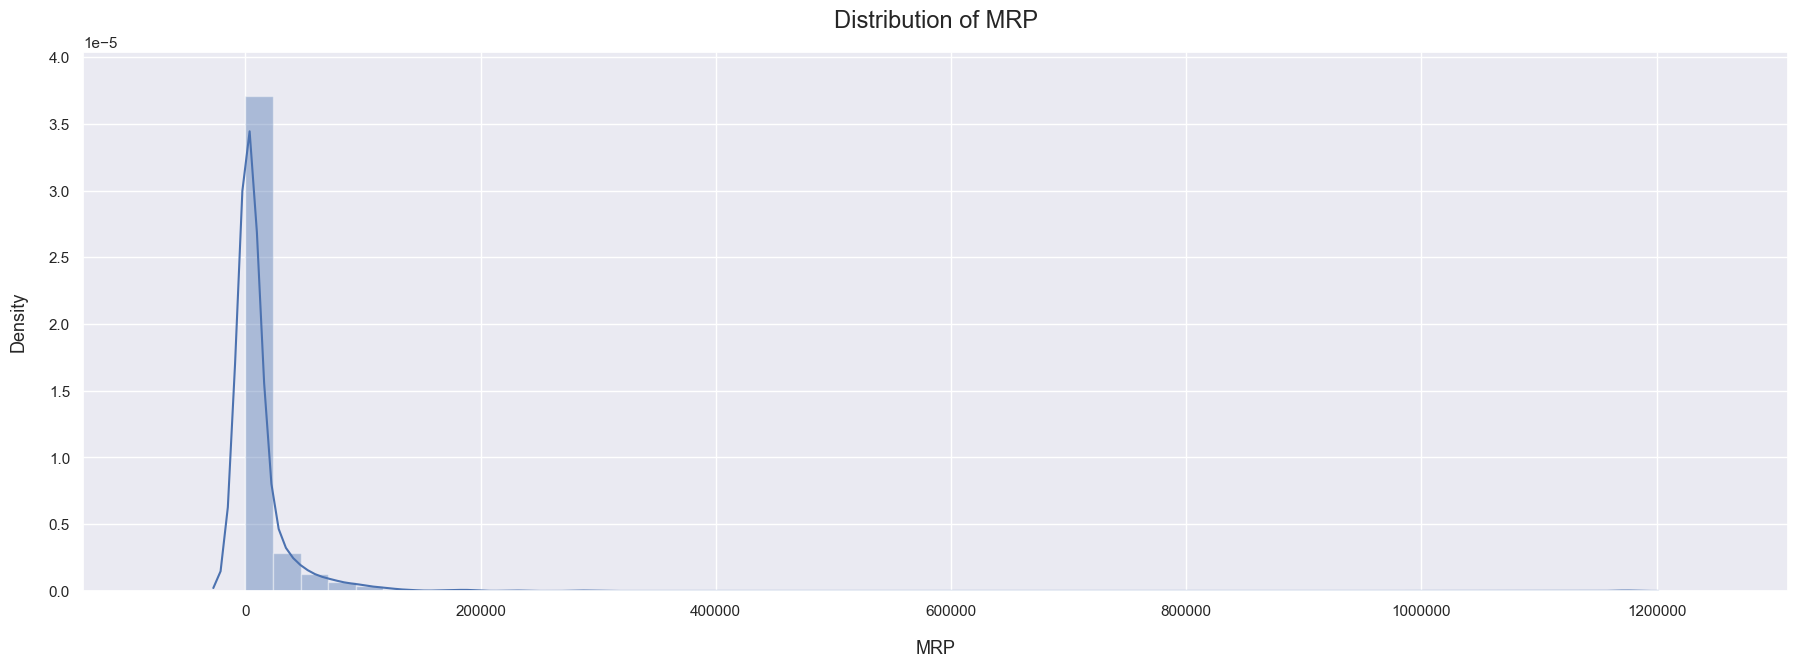

In [54]:
# Visualize the distribution of MRP
ax = sns.distplot(df_mrp['mrp'])
ax.set_title('Distribution of MRP', fontdict={'size':17}, y=1.03)
ax.set_ylabel('Density', labelpad=15, fontdict={'size':13})
ax.set_xlabel('MRP', labelpad=15, fontdict={'size':13})
formatter = ticker.ScalarFormatter() # create a ScalarFormatter object
ax.xaxis.set_major_formatter(formatter) # apply the formatter to the x-axis ticks
ax.yaxis.set_major_formatter(formatter) # apply the formatter to the y-axis ticks
plt.show()

#### Conclusion:
* MRP ranges from Rs.65.0 to Rs.1174131.0.
* Data includes 1414 unique MRP amounts for various products.
* Most of the products sold come under MRP of Rs. 999.0 approximately for 1429 units, followed by Rs. 1999.
* Total 1332 products are sold which come under MRP of Rs.50000 and only 81 products are sold above MRP of Rs.50000.
* In MRP column there are only two units of the product which has minimum price of Rs.65.0 have been sold and one unit has been sold which has minimum price of Rs.1174131.0.



### Distribution of Products falling within each Category of Product Rating

In [55]:
# Compute the distribution of products falling within each category of product rating
query = """ Select distinct(product_rating),
            count(product_rating) as units_sold
            from sales
            where product_rating is not null
            group by product_rating
            order by units_sold desc; """

df_product_rating = pd.read_sql_query(query, connection)
df_product_rating

,product_rating,units_sold
0,4.0,1697
1,4.1,1692
2,4.2,1495
3,4.3,1343
4,3.9,1234
5,3.8,886
6,4.4,838
7,3.7,542
8,4.5,427
9,3.6,354


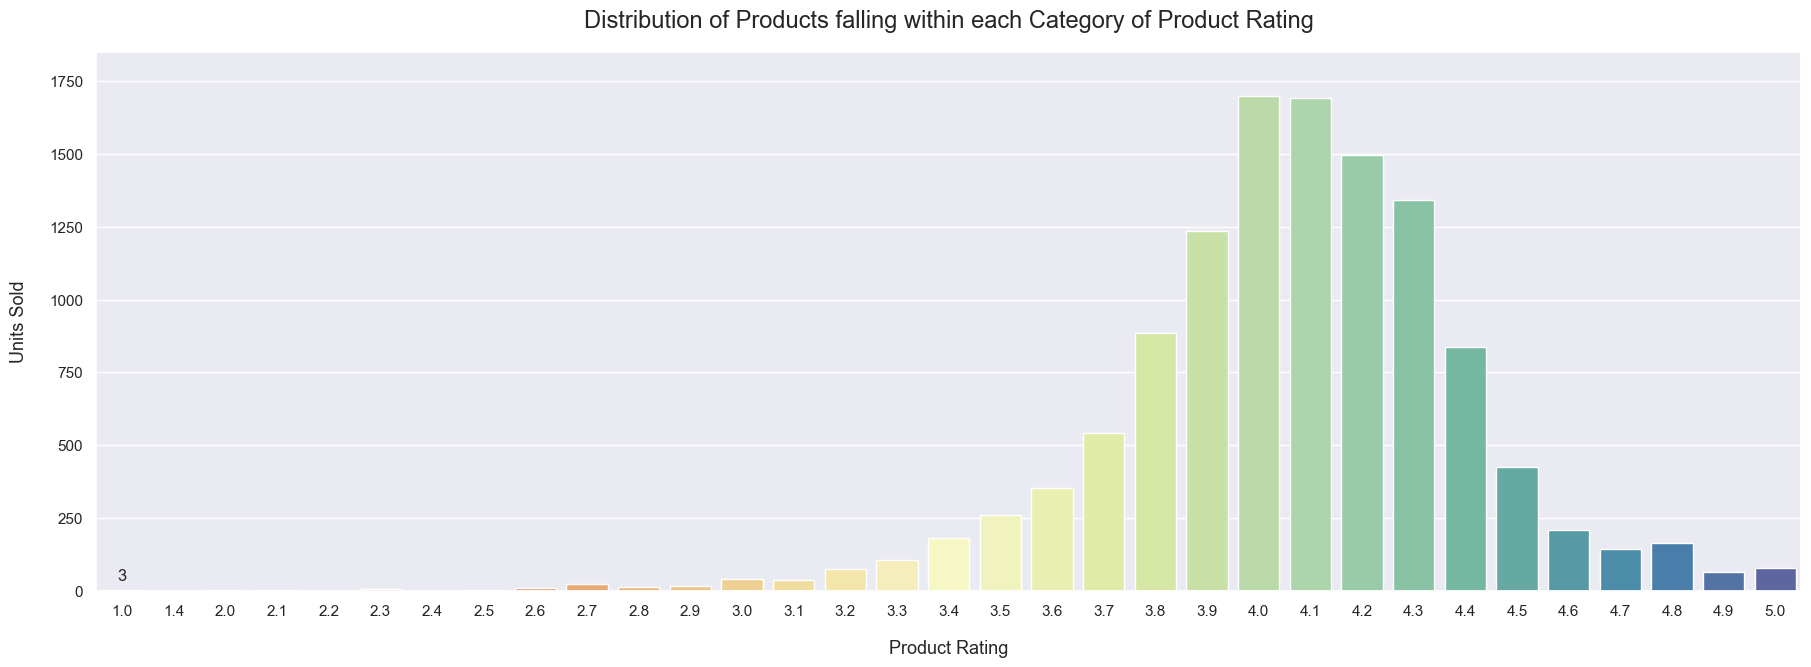

In [56]:
# Visualize the distribution of products fall within each category of product rating
ax = sns.barplot(x ='product_rating', y='units_sold', data=df_product_rating, ci=None, palette="Spectral")
ax.set_title("Distribution of Products falling within each Category of Product Rating", fontdict={'size':17}, y=1.03)
ax.set_ylabel('Units Sold', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Product Rating', labelpad=15, fontdict={'size':13})
ax.bar_label(ax.containers[0], padding=5)
plt.show()

#### Conclusion:
* Product ratings range from 1.0 to 5.0 stars.
* There are 33 categories of product ratings in the data.
* Around 1697 products sold, fall in the rating range of 4.0, followed by 4.1 around 1692, then product rating 4.2 and 4.3 and so on.


### Distribution of Seller Ratings

In [57]:
# Compute how many products fall in each category of seller rating
query = """ Select distinct(seller_rating), count(seller_rating) as units_sold
            from sales
            where seller_rating is not null
            group by seller_rating
            order by units_sold desc; """

df_seller_rating = pd.read_sql_query(query, connection)
df_seller_rating

,seller_rating,units_sold
0,4.8,1565
1,4.7,1382
2,4.4,1241
3,4.9,1097
4,4.3,957
5,4.6,956
6,4.1,917
7,4.2,796
8,3.9,582
9,4.0,544


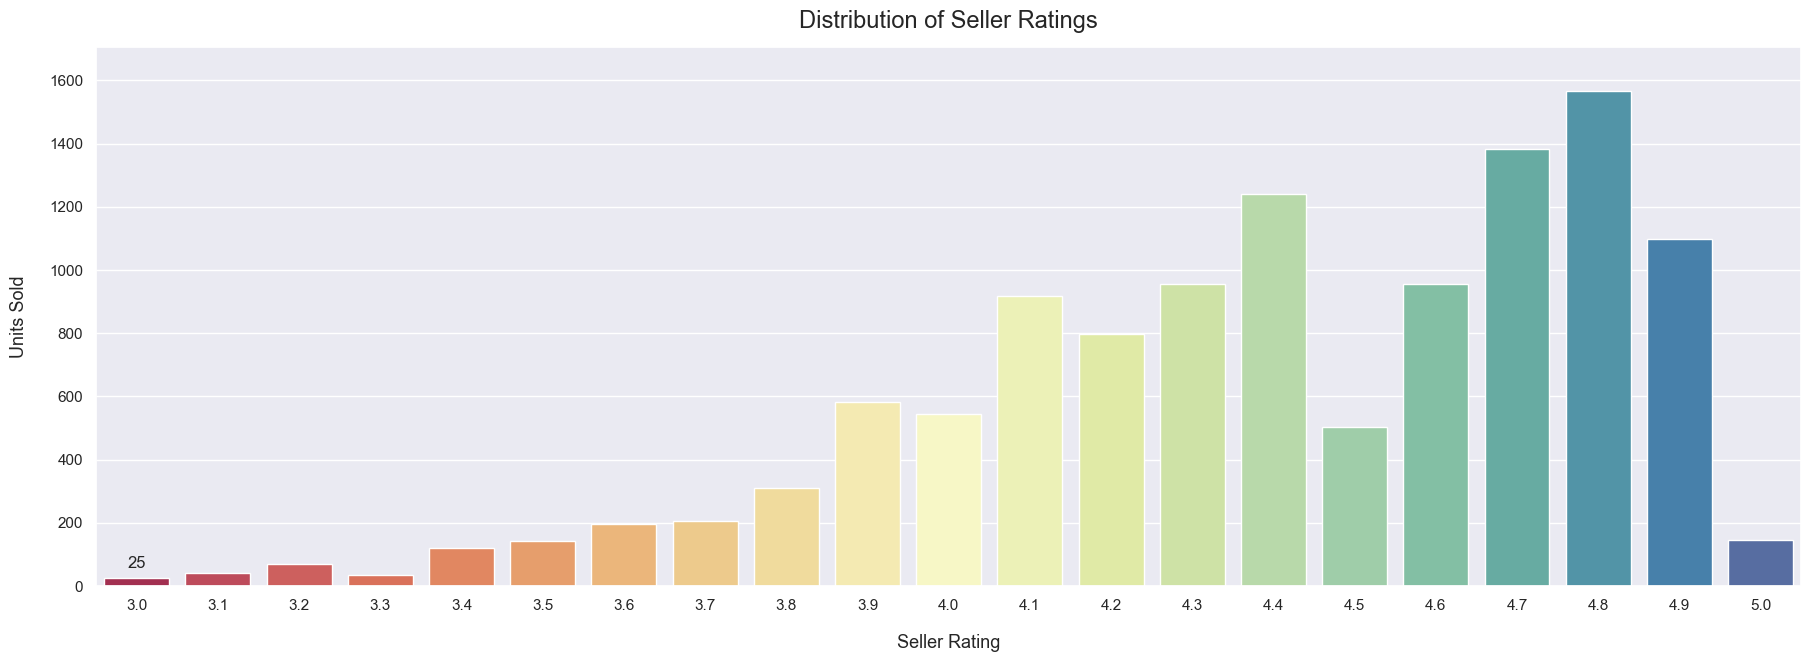

In [58]:
# Visualize the distribution of Seller Ratings
ax = sns.barplot(x='seller_rating', y='units_sold', data=df_seller_rating, ci=None, palette="Spectral")
ax.set_title("Distribution of Seller Ratings", fontdict={'size':17}, y=1.02)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Units Sold', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Seller Rating', labelpad=15, fontdict={'size':13})
plt.show()

#### Conclusion:
* Seller ratings range from 3.0 to 5.0 stars.
* Data includes 21 unique categories of seller ratings.
* Most products sold have a seller rating of 4.8 around 1565, followed by seller ratings of 4.7 and 4.7.


### Distribution of Average Discounts Offered in each Main Product Category

In [59]:
# Compute the average discount offered in each main category of product
query = """ select distinct(main_category) as main_category, 
            round(avg(mrp), 2) as avg_mrp,
            round(avg(selling_price), 2) as avg_selling_price,
            round(avg(mrp - selling_price), 2) as price_difference,
            round(avg((1 - (selling_price / mrp))*100), 2) as avg_discount
            from sales
            where mrp is not null
            group by main_category
            order by avg_discount desc;"""

df_discount = pd.read_sql_query(query, connection)
df_discount

,main_category,avg_mrp,avg_selling_price,price_difference,avg_discount
0,Women's wear,1914.99,756.88,1158.11,61.57
1,Men's wear,2122.38,864.02,1258.36,56.23
2,Baby and Kids,1232.45,510.16,722.29,54.31
3,Home and Furniture,4436.17,2253.96,2182.21,53.53
4,Electronics,10499.90,6688.95,3810.95,52.03
5,"Sports, Books and More",3159.18,1523.49,1635.69,46.53


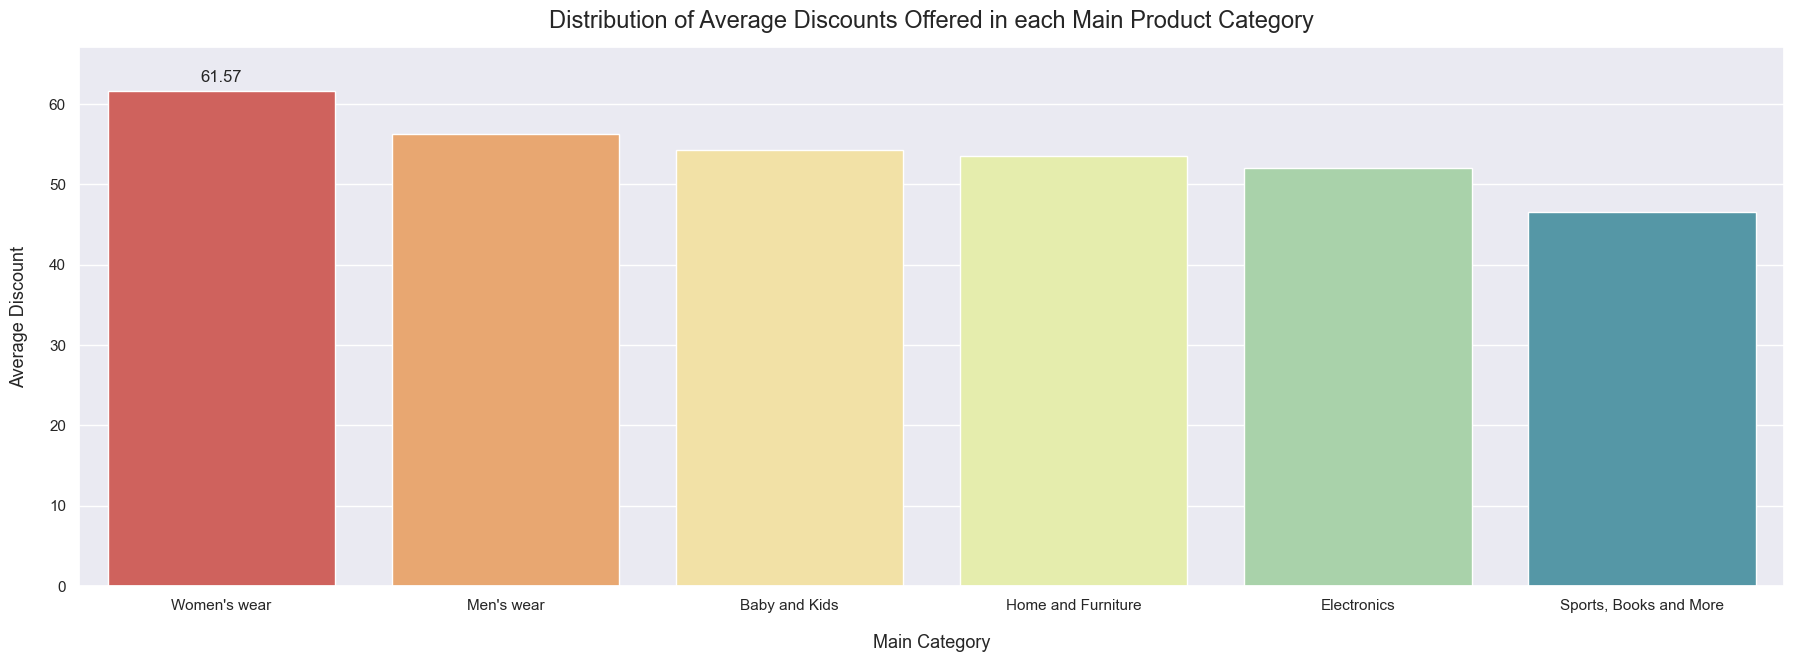

In [60]:
# Visualize the distribution of average discount offered in each main category of product
ax = sns.barplot(x='main_category', y='avg_discount', data=df_discount, ci=None, palette="Spectral")
ax.set_title("Distribution of Average Discounts Offered in each Main Product Category", fontdict={'size':17}, y=1.02)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Average Discount', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Main Category', labelpad=15, fontdict={'size':13})
plt.show()

#### Conclusion:
* Average discount ranges from 46.53% to 61.57%.
* There are total 5 unique main categories of the product.
* The main category of women's apparel has the highest average discount of around 61.57% on most products, followed by discounts on men's apparel and baby and children's products.



### Distribution of Average Discount Offered in each Subcategory of the Product


In [61]:
# Compute the average discount offered in each subcategory of the product
query = """ select distinct(sub_category) as sub_category, 
            round(avg(mrp), 2) as avg_mrp,
            round(avg(selling_price), 2) as avg_selling_price,
            round(avg(mrp - selling_price), 2) as price_difference,
            round(avg((1 - (selling_price / mrp))*100), 2) as avg_discount
            from sales
            where mrp is not null
            group by sub_category
            order by avg_discount desc;"""

df_discount1 = pd.read_sql_query(query, connection)
df_discount1

,sub_category,avg_mrp,avg_selling_price,price_difference,avg_discount
0,Party Dresses,2196.70,475.25,1721.45,78.41
1,Kids Sunglasses,1359.31,261.44,1097.87,77.29
2,Kids Watches,1287.73,262.83,1024.90,76.05
3,Top Wear,1733.29,410.76,1322.53,75.44
4,Kids Clothing,1579.75,368.50,1211.25,73.86
...,...,...,...,...,...
72,Pet Supplies,1016.82,744.55,272.27,29.73
73,Laptops,145450.21,78492.67,66957.54,29.33
74,Gaming and Accessories,43179.60,32723.60,10456.00,28.46
75,Computer Peripherals,22924.65,16690.06,6234.59,19.80


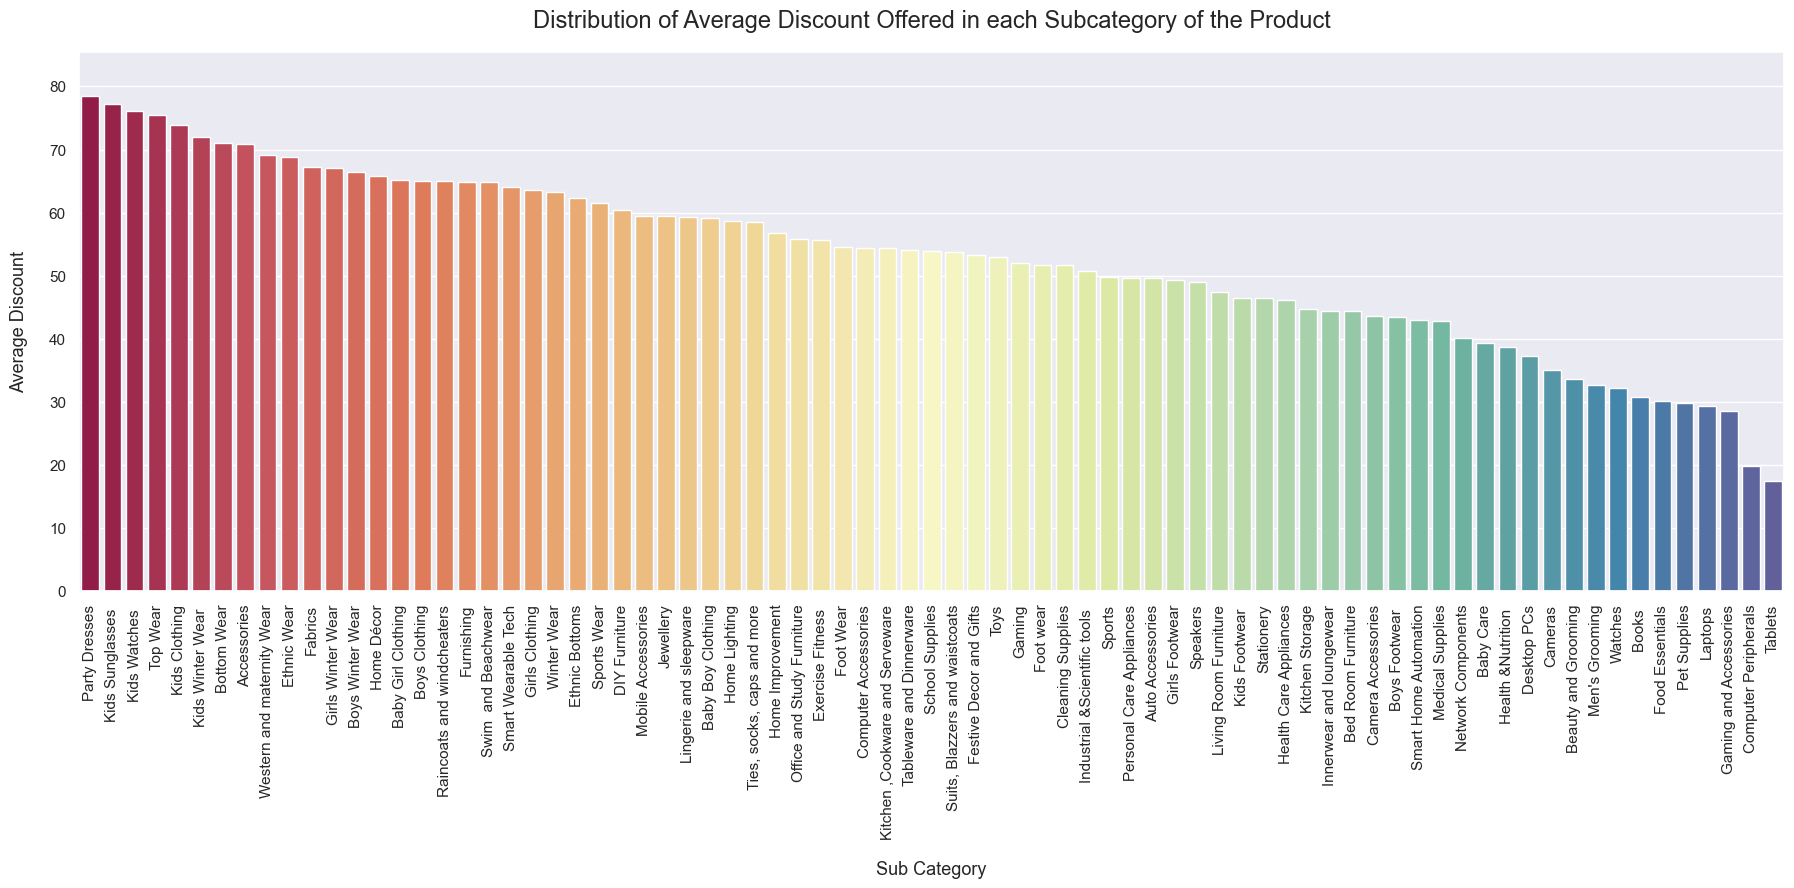

In [62]:
# Visualize the distribution of average discount offered in each subcategory of the product
ax = sns.barplot(x='sub_category', y='avg_discount', data=df_discount1, ci=None, palette="Spectral")
ax.set_title("Distribution of Average Discount Offered in each Subcategory of the Product", fontdict={'size':17}, y=1.03)
ax.set_ylabel('Average Discount', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Sub Category', labelpad=15, fontdict={'size':13})
plt.xticks(rotation=90)
plt.show()


#### Conclusion:
* Average discount ranges from 17.39 to 78.41%.
* There are a total of 76 unique sub categories of the product.
* Most of the products which fall under the sub category party dresses have an average discount of around 78.41%, followed by kids sunglasses and kids watches.




### Distribution of Average Discount offered for each Product Type

In [63]:
# Compute the distribution of average discount offered for each product type
query = """ select distinct(product_type) as product_type, 
            round(avg(mrp), 2) as avg_mrp,
            round(avg(selling_price), 2) as avg_selling_price,
            round(avg(mrp - selling_price), 2) as price_difference,
            round(avg((1 - (selling_price / mrp))*100), 2) as avg_discount
            from sales
            where mrp is not null
            group by product_type
            order by avg_discount desc
            limit 50;"""

df_discount2 = pd.read_sql_query(query, connection)
df_discount2

,product_type,avg_mrp,avg_selling_price,price_difference,avg_discount
0,Artificial Jewellery,2019.90,229.08,1790.83,85.89
1,Track pants,2107.28,351.30,1755.98,82.18
2,Sarees,3240.78,572.55,2668.23,80.51
3,Belts,1549.06,315.18,1233.88,79.03
4,Dress Material,1814.35,350.48,1463.88,78.65
5,Party Dresses,2196.70,475.25,1721.45,78.41
6,Jewellery,1527.83,444.08,1083.75,77.97
7,Kids Sunglasses,1359.31,261.44,1097.87,77.29
8,Kurta Sets and Salwar Suits,3264.25,706.35,2557.90,77.16
9,Lehenga Choli,3168.13,678.18,2489.95,76.40


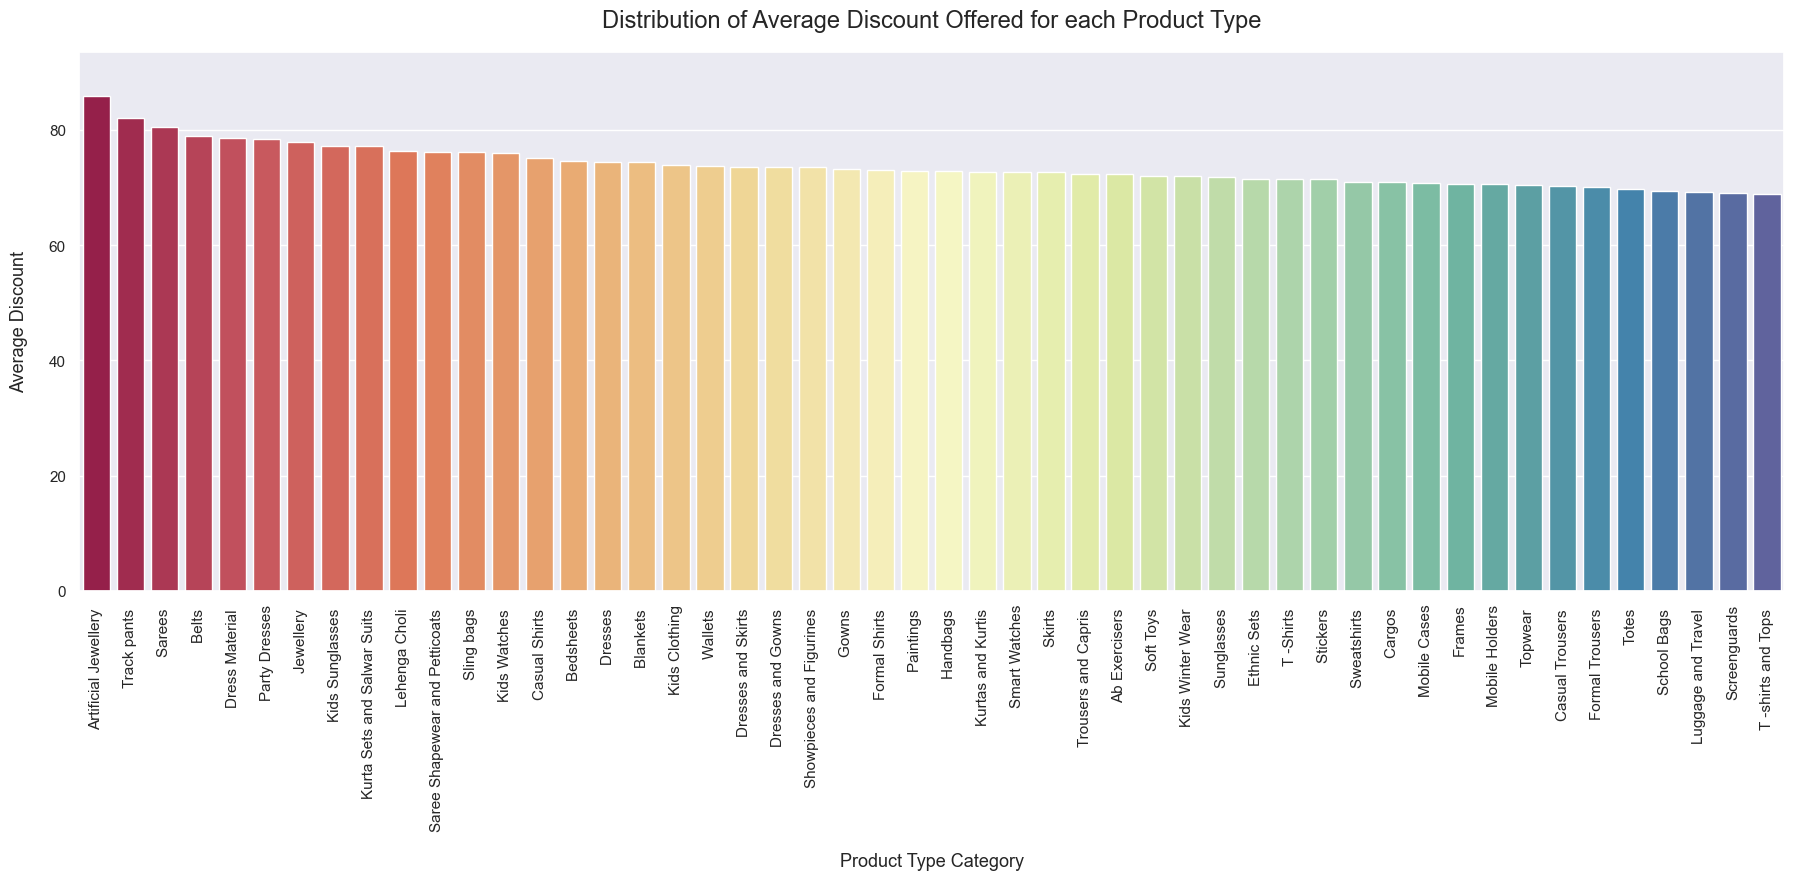

In [64]:
# Visualize the distribution of average discount offered for each product type
ax = sns.barplot(x='product_type', y='avg_discount', data=df_discount2, ci=None, palette="Spectral")
ax.set_title("Distribution of Average Discount Offered for each Product Type", fontdict={'size':17}, y=1.03)
ax.set_ylabel('Average Discount', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Product Type Category', labelpad=15, fontdict={'size':13})
plt.xticks(rotation=90)
plt.show()

#### Conclusion:
* Average discount ranges from 68.86 to 85.89%.
* There are 300 unique product types in total.
* Most of the products which fall under product type artificial jewelery have an average discount of around 85.89%, followed by track pants and sarees.


### Distribution of the Most Expensive Product in each Main Category

In [65]:
# Let's compute the distribution of the most expensive product in each main category
query = """ Select main_category,
            max(selling_price) as max_selling_price
            from sales
            where selling_price is not null
            group by main_category
            order by max_selling_price desc;"""

df_max_selling_price = pd.read_sql_query(query, connection)
df_max_selling_price

,main_category,max_selling_price
0,Electronics,300490.0
1,Women's wear,85360.0
2,"Sports, Books and More",85000.0
3,Home and Furniture,49999.0
4,Baby and Kids,45599.0
5,Men's wear,16495.0


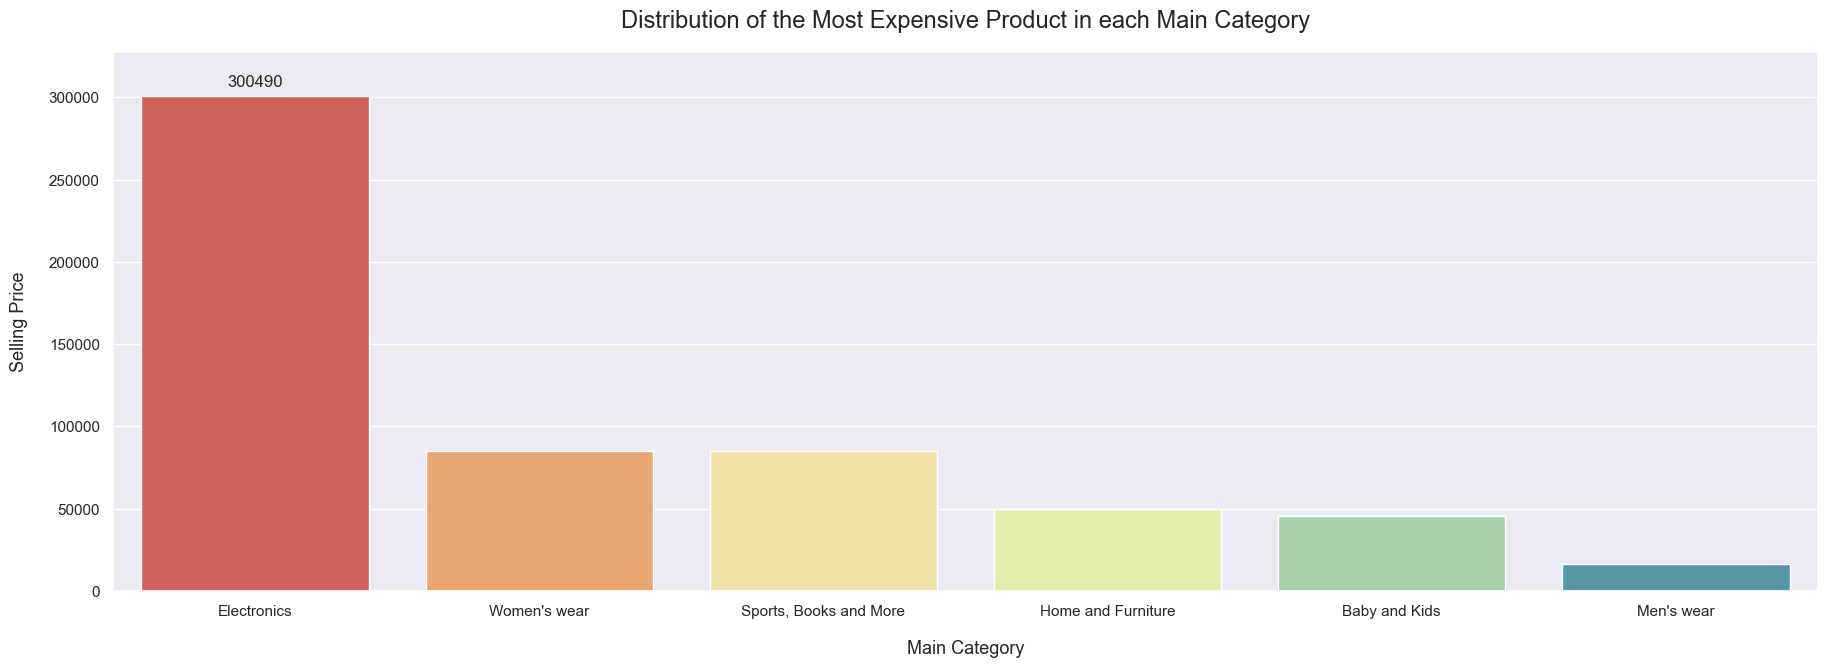

In [66]:
# Visualize the distribution of the most expensive product in each main category
ax = sns.barplot(x ='main_category', y='max_selling_price', data=df_max_selling_price, ci=None, palette="Spectral")
ax.set_title("Distribution of the Most Expensive Product in each Main Category", fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Selling Price', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Main Category', labelpad=15, fontdict={'size':13})
plt.show()

#### Conclusion:
* Most Expensive Product ranges from Rs. 16495 to Rs. 300490.
* In Main Category, Electronics have the most expensive product of Rs. 300490 followed by Women's wear and Sports, Books and More.


### Distribution of the Most Expensive Product in Each Subcategory of the Product

In [67]:
# Compute the distribution of the most expensive product in each subcategory of the product
query = """ Select sub_category,
            max(selling_price) as max_selling_price
            from sales
            where selling_price is not null
            group by sub_category
            order by max_selling_price desc;"""

df_max_selling_price1 = pd.read_sql_query(query, connection)
df_max_selling_price1

,sub_category,max_selling_price
0,Laptops,300490.0
1,Camera Accessories,199690.0
2,Desktop PCs,189990.0
3,Cameras,97995.0
4,Jewellery,85360.0
...,...,...
72,Kids Clothing,809.0
73,"Ties, socks, caps and more",799.0
74,Festive Decor and Gifts,683.0
75,Kids Sunglasses,479.0


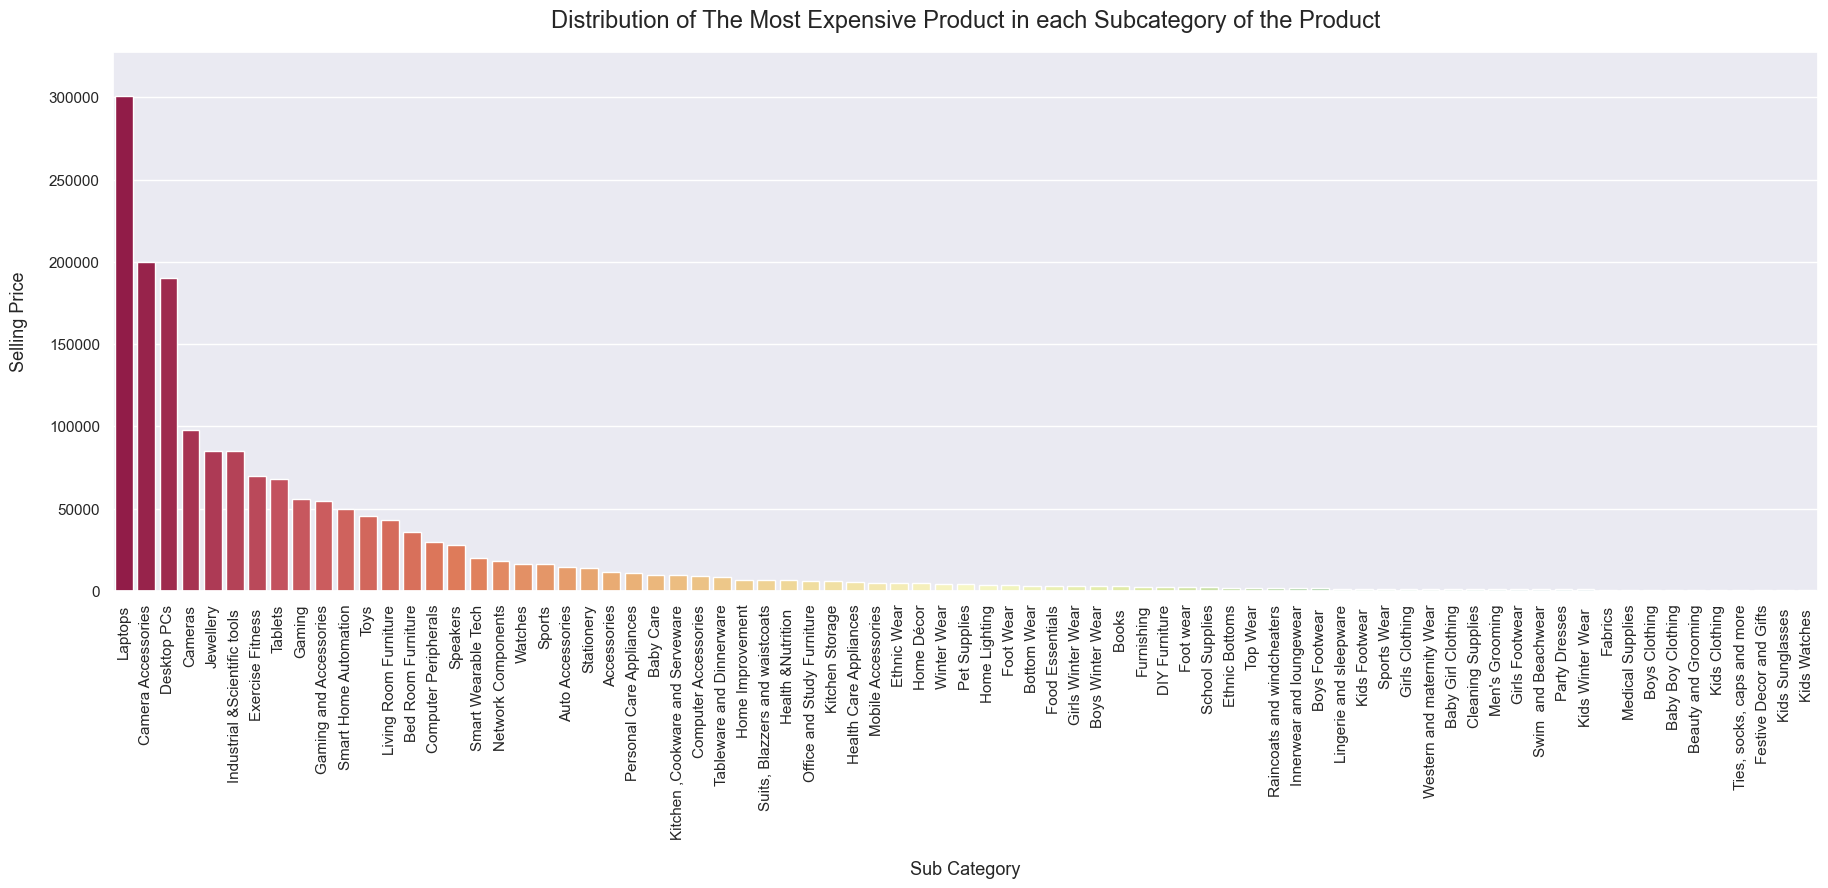

In [68]:
# Visualize the distribution of the most expensive product in each subcategory of the product
ax = sns.barplot(x ='sub_category', y='max_selling_price', data=df_max_selling_price1, ci=None, palette="Spectral")
ax.set_title("Distribution of The Most Expensive Product in each Subcategory of the Product", fontdict={'size':17}, y=1.03)
ax.set_ylabel('Selling Price', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Sub Category', labelpad=15, fontdict={'size':13})
plt.xticks(rotation=90)
plt.show()


#### Conclusion:
* Most expensive products ranges from Rs. 16495 to Rs. 300490.
* In Sub Category, The most expensive product is Laptop Rs. 300490 are followed by Camera Accessories and Desktop PCs.


### Distribution of 50 Top Most Expensive Products

In [69]:
# Compute the distribution of the top 50 most expensive products
query = """ Select product_type,
            max(selling_price) as max_selling_price
            from sales
            where selling_price is not null
            group by product_type
            order by max_selling_price desc
            limit 50;"""

df_max_selling_price2 = pd.read_sql_query(query, connection)
df_max_selling_price2

,product_type,max_selling_price
0,Gaming Laptops,300490.0
1,Lens,199690.0
2,Desktop PCs,189990.0
3,DSLR and Mirrorless,97995.0
4,Coins and Bars,85360.0
5,Industrial Testing Devices,85000.0
6,Cardio Equipment,69999.0
7,Apple Ipads,68079.0
8,Gaming Consoles,55990.0
9,Gaming and Accessories,54890.0


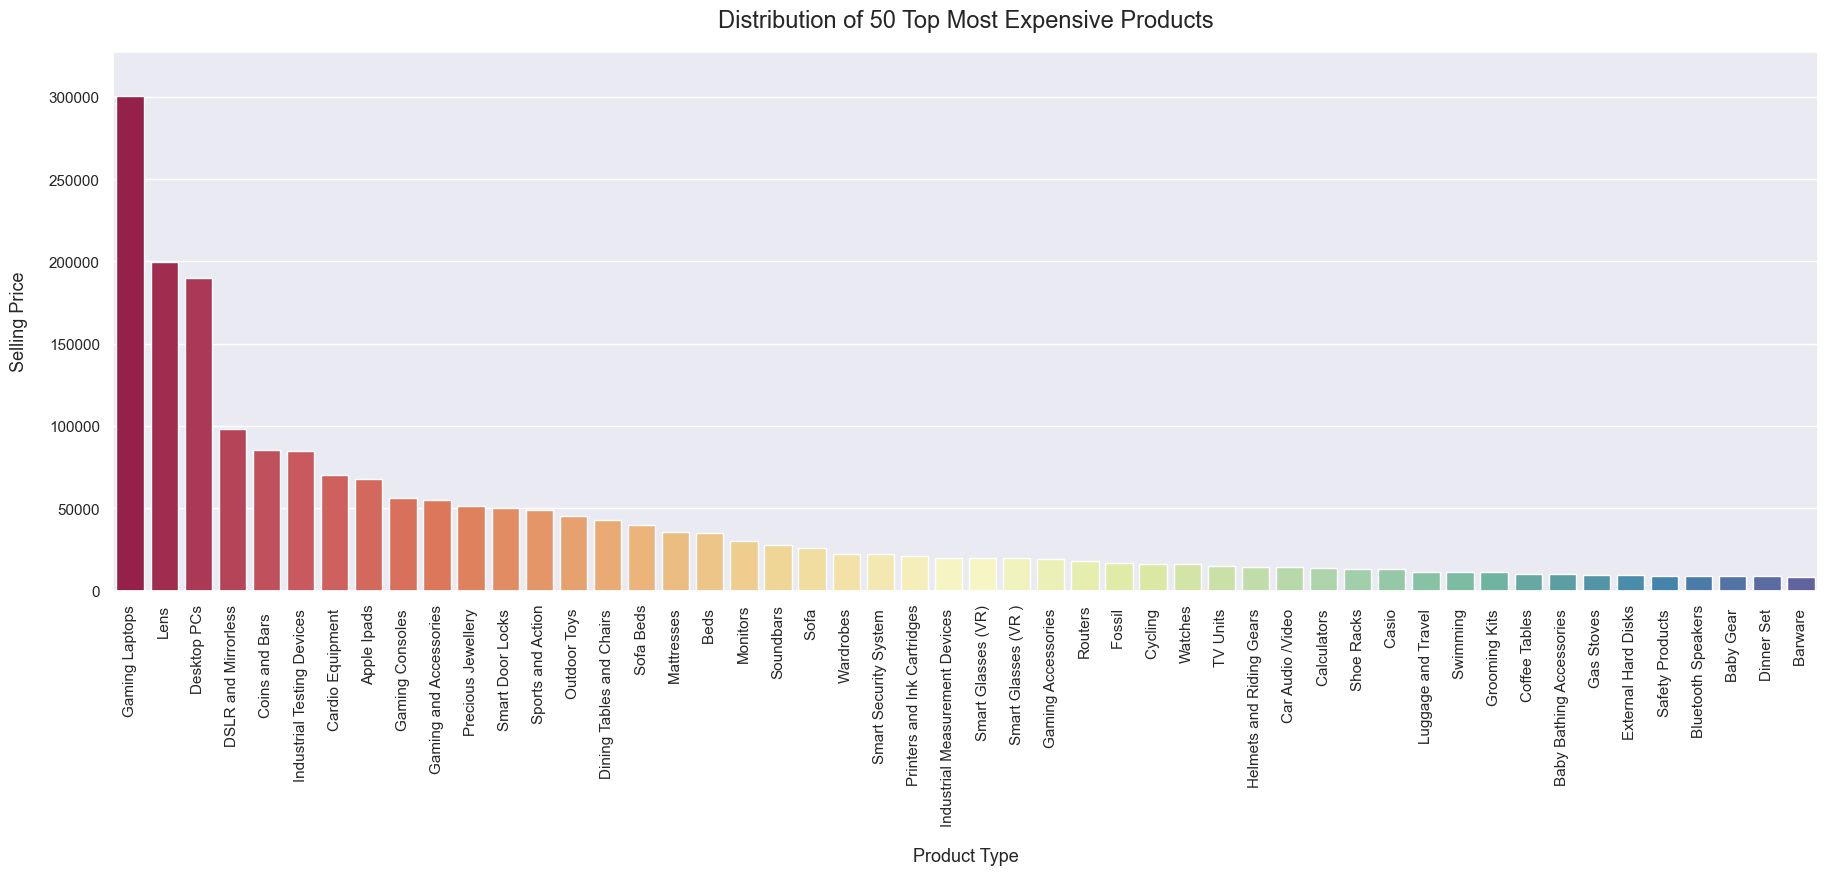

In [70]:
# Visualize the distribution of 50 top most expensive products
ax = sns.barplot(x ='product_type', y='max_selling_price', data=df_max_selling_price2, ci=None, palette="Spectral")
ax.set_title("Distribution of 50 Top Most Expensive Products", fontdict={'size':17}, y=1.03)
ax.set_ylabel('Selling Price', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Product Type', labelpad=15, fontdict={'size':13})
plt.xticks(rotation=90)
plt.show()

#### Conclusion:
* Top 50 most expensive products ranges from Rs. 16495 to Rs. 300490.
* The most expensive product is Gaming Laptop priced at Rs. 300490, followed by Lens and Desktop PC.


### Distribution of the Top 50 Sellers by Most Expensive Product

In [71]:
# Compute the distribution of the top 50 sellers by most expensive product
query = """ Select seller_name,
            max(selling_price) as most_expensive_product
            from sales 
            where seller_name is not null
            group by seller_name
            order by most_expensive_product desc
            limit 50;"""

df_expensive_product = pd.read_sql_query(query, connection)
df_expensive_product

,seller_name,most_expensive_product
0,PETILANTE Online,300490.0
1,RetailNet,199690.0
2,OmniTechRetail,189990.0
3,TBsmart,118995.0
4,TheAstrum,101645.0
5,CORSECA,97995.0
6,MMTCPAMP,85360.0
7,TREASURE HAUL ONLINE,82990.0
8,TBL Online,81900.0
9,TheBrandPartner,78890.0


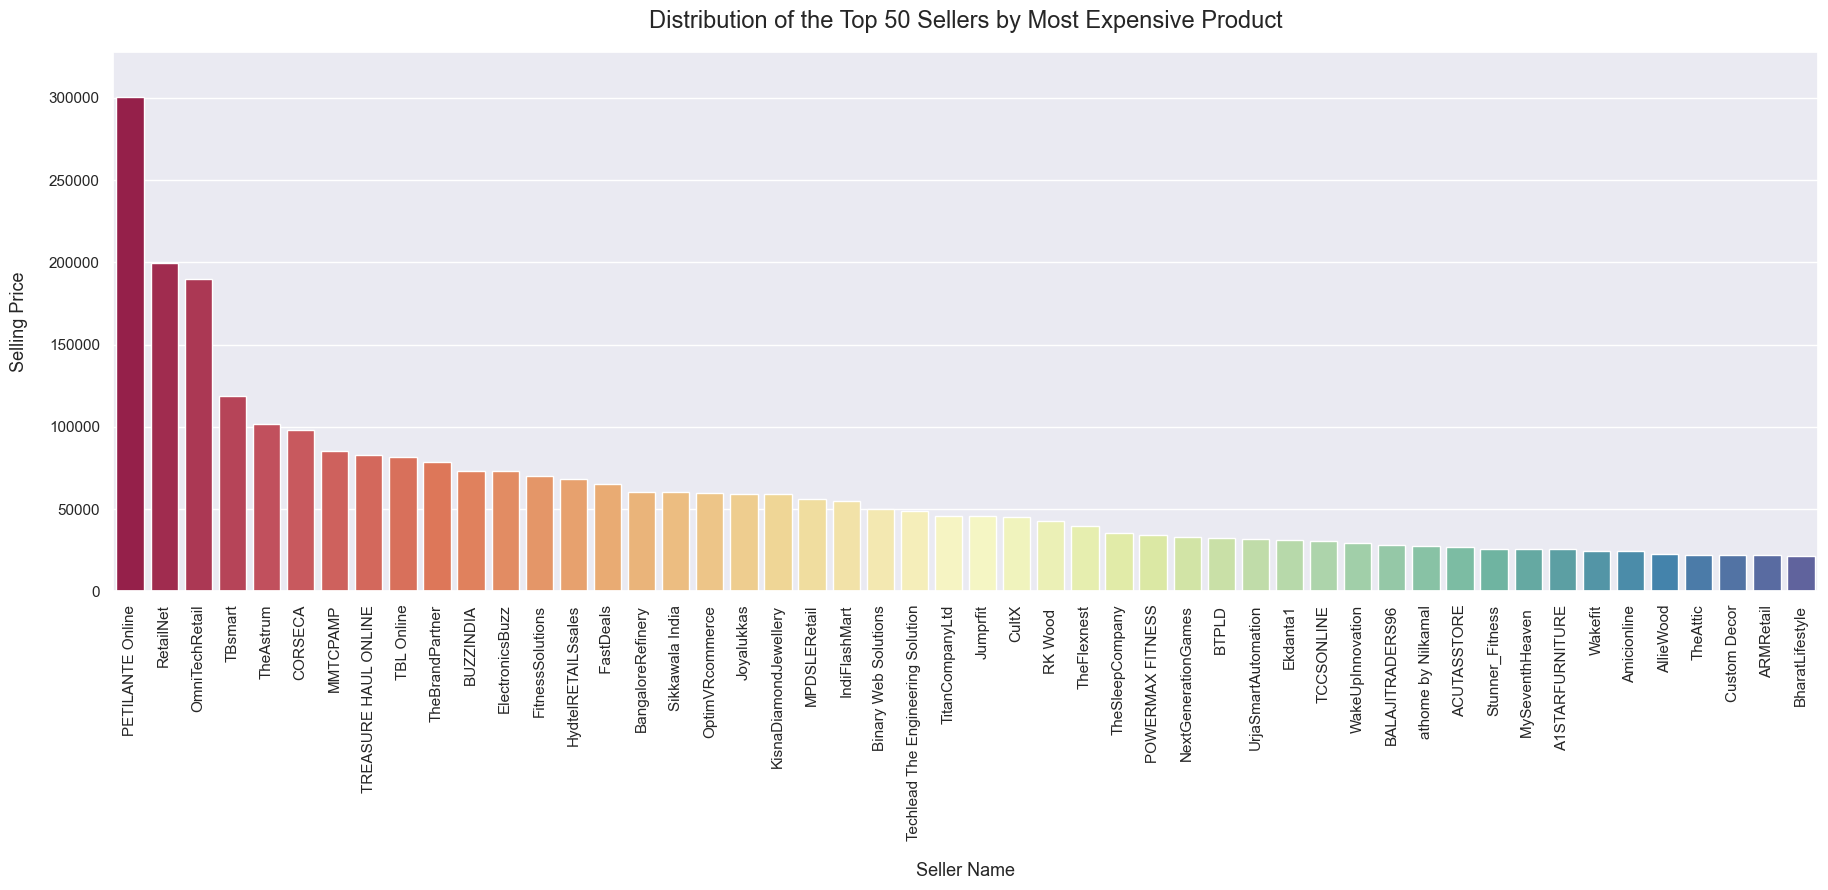

In [72]:
# Visualize the distribution of the top 50 sellers by most expensive product
ax = sns.barplot(x ='seller_name', y='most_expensive_product', data=df_expensive_product, ci=None, palette="Spectral")
ax.set_title("Distribution of the Top 50 Sellers by Most Expensive Product", fontdict={'size':17}, y=1.03)
plt.xticks(rotation=90)
ax.set_ylabel('Selling Price', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Seller Name', labelpad=15, fontdict={'size':13})
plt.show()

#### Conclusion:
* The most expensive product ranges from Rs.21599 to Rs.300490 for the top 50 sellers.
* The most expensive product is Rs.300490 from seller PETILANTE Online, followed by Retailnet and Omnitechretail.


### Distribution of Top 50 Sellers by Sales Volume

In [73]:
# Compute the distribution of top 50 sellers by sales volume
query = """ Select seller_name,
            count(seller_name) as total_sales
            from sales 
            where seller_name is not null
            group by seller_name
            order by total_sales desc
            limit 50;"""

df_total_sales = pd.read_sql_query(query, connection)
df_total_sales

,seller_name,total_sales
0,RetailNet,601
1,SuperComNet,266
2,MYTHANGLORYRetail,258
3,HSAtlastradeFashion,257
4,SURICYBCOMBazaar,193
5,DIIATBonline,154
6,Wizrob Fashion,137
7,TRIPR,94
8,MTAILMODEECOM,81
9,SUGSHAANnet,62


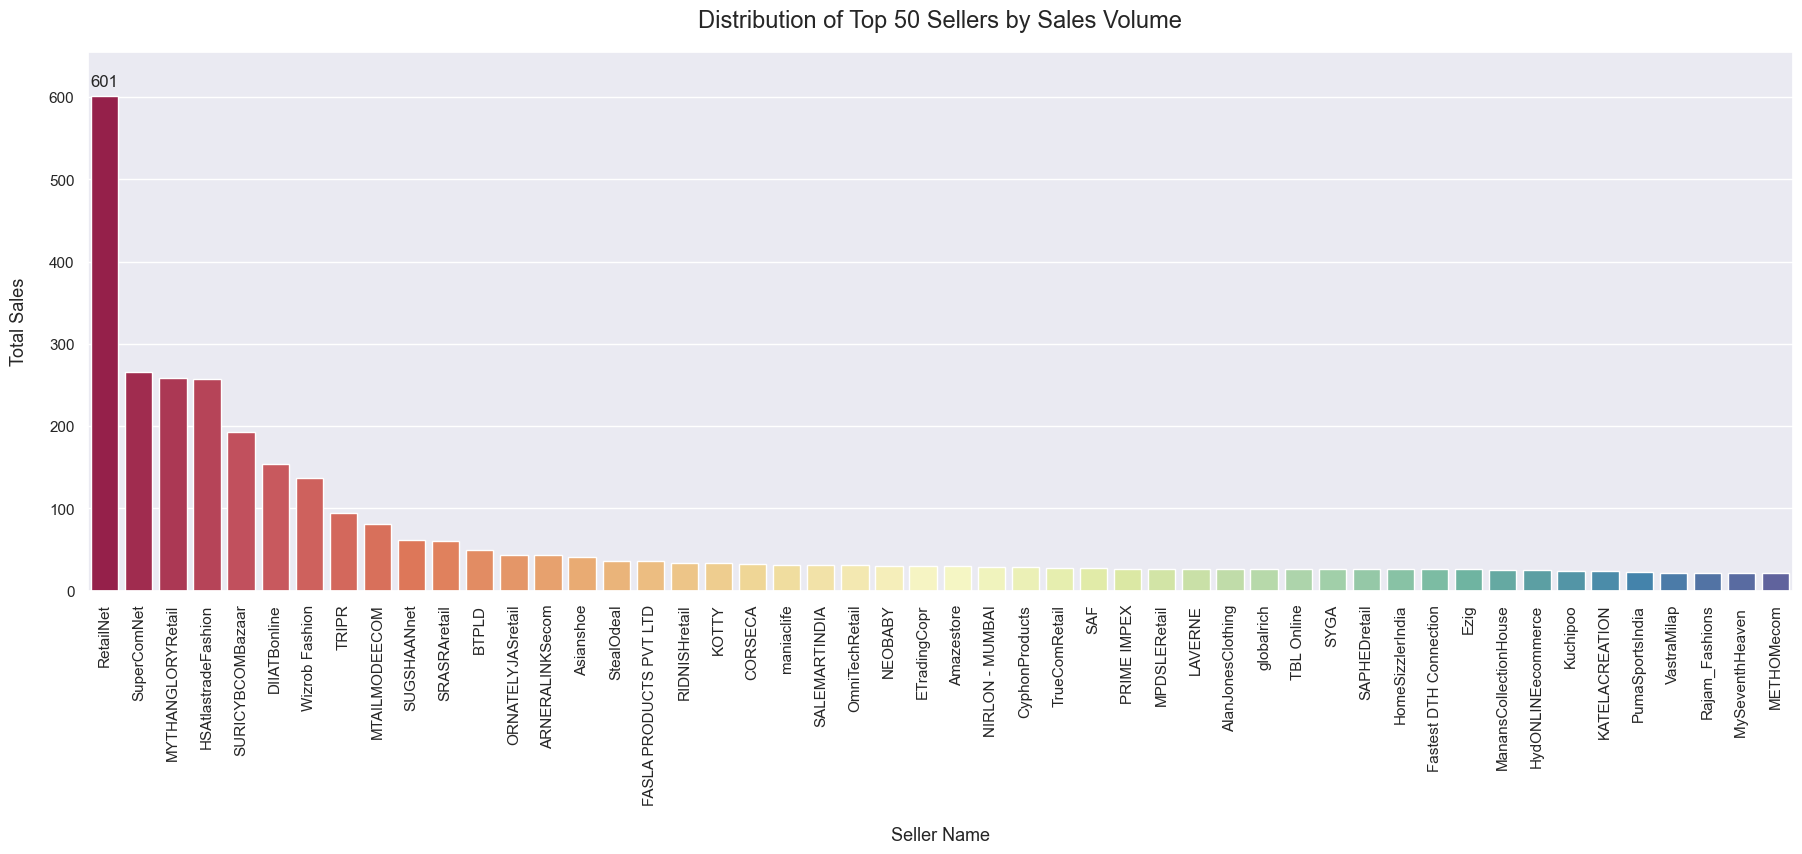

In [74]:
# Visualize the distribution of top 50 sellers by sales volume
ax = sns.barplot(x ='seller_name', y='total_sales', data=df_total_sales, ci=None, palette="Spectral")
ax.set_title("Distribution of Top 50 Sellers by Sales Volume", fontdict={'size':17}, y=1.03)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Total Sales', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Seller Name', labelpad=15, fontdict={'size':13})
plt.show()

#### Conclusion:
* Sales volume ranges from 22 to 601.
* Seller RetailNet has the highest sales volume of 601, followed by SuperComNet, MythangloryRetail and HSAtlastradeFashion and so on.


### Distribution of Unique Sellers in each Category of Product Rating

In [75]:
# Compute the distribution of unique sellers in each category of product rating
query =""" SELECT product_rating,
           count(distinct(seller_name)) as unique_sellers
           FROM sales
           where product_rating is not null
           GROUP BY product_rating; """

df_unique_sellers = pd.read_sql_query(query, connection)
df_unique_sellers

,product_rating,unique_sellers
0,1.0,3
1,1.4,1
2,2.0,1
3,2.1,1
4,2.2,1
5,2.3,2
6,2.4,0
7,2.5,3
8,2.6,3
9,2.7,2


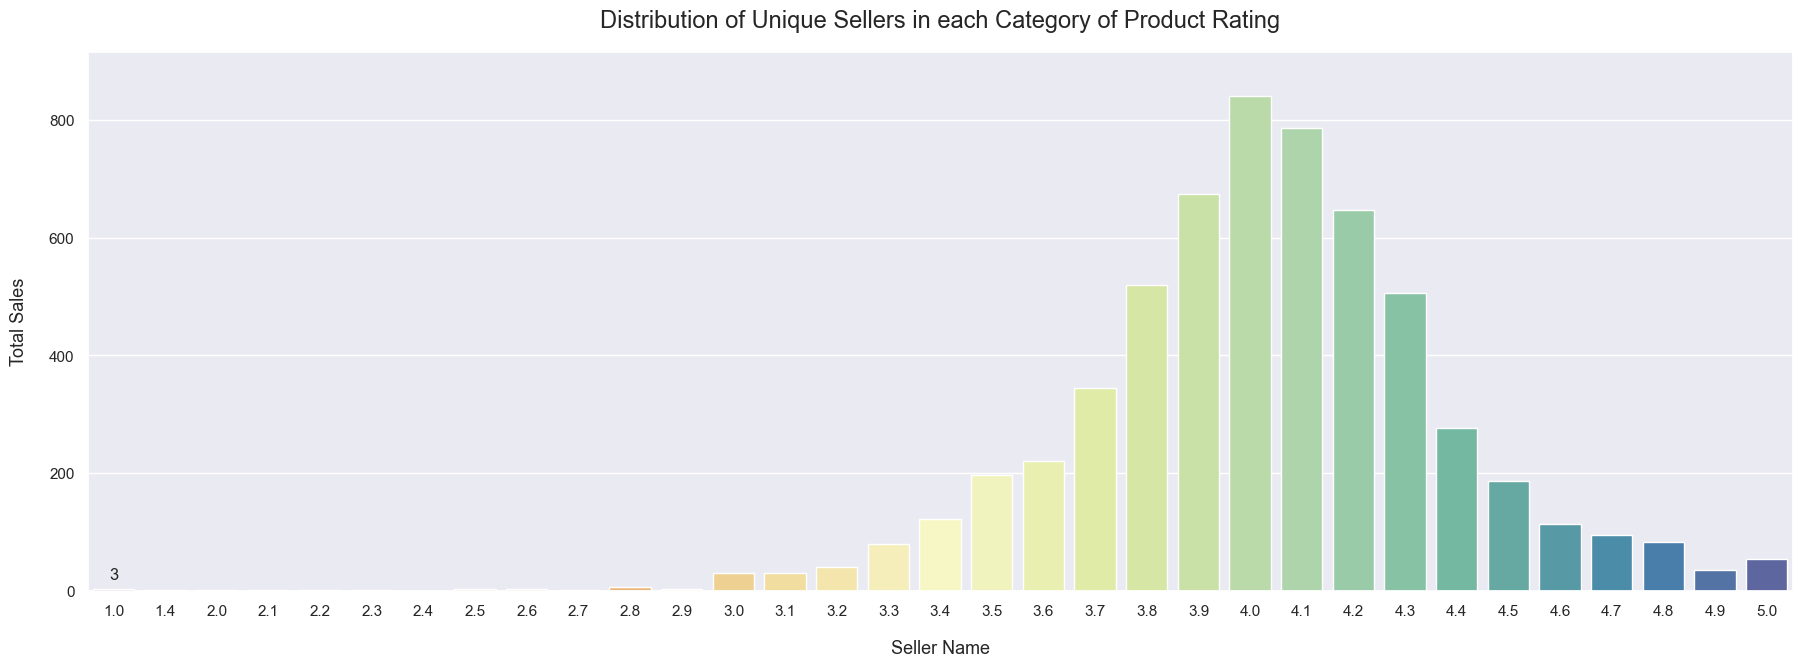

In [76]:
# Visualize the distribution of unique sellers in each category of product rating
ax = sns.barplot(x ='product_rating', y='unique_sellers', data=df_unique_sellers, ci=None, palette="Spectral")
ax.set_title("Distribution of Unique Sellers in each Category of Product Rating", fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Total Sales', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Seller Name', labelpad=15, fontdict={'size':13})
plt.show()

#### Conclusion:
* Product rating ranges from 1.0 stars to 5.0 stars.
* Number of unique seller ranges from 3 to 840.
* Most seller are in the category of product rating of 4.0 stars about 840, followed by 4.1, 3.9 and 4.2 stars.



### Distribution of Unique Sellers in each Main Category of the Product

In [77]:
# Compute the distribution of unique sellers in each main category of the product
query =""" SELECT main_category,
           (count(distinct(seller_name))) as unique_sellers
           FROM sales where seller_name is not null
           GROUP BY main_category
           order by unique_sellers desc;"""

df_cat1_unique_sellers = pd.read_sql_query(query, connection)
df_cat1_unique_sellers

,main_category,unique_sellers
0,Women's wear,822
1,Home and Furniture,815
2,Baby and Kids,692
3,Men's wear,581
4,"Sports, Books and More",528
5,Electronics,310


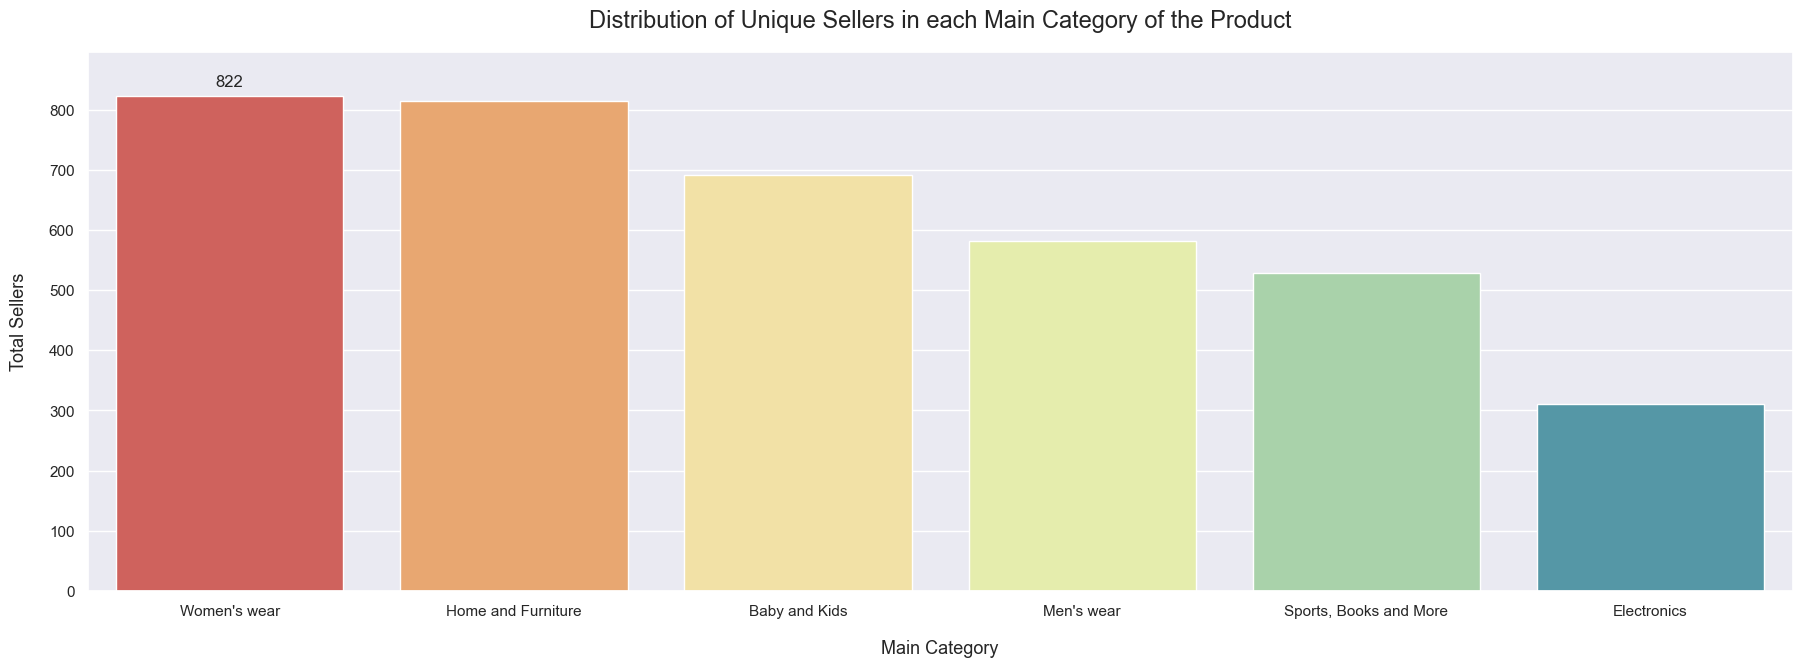

In [78]:
# Visualize the distribution of unique sellers in each main category of the product
ax = sns.barplot(x ='main_category', y='unique_sellers', data=df_cat1_unique_sellers, ci=None, palette="Spectral")
ax.set_title("Distribution of Unique Sellers in each Main Category of the Product", fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Total Sellers', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Main Category', labelpad=15, fontdict={'size':13})
plt.show()

#### Conclusion:
* Total unique seller ranges from 310 to 822.
* In the main category of product, Women's Wear has the most unique sellers about 822, followed by Home and Furniture and Baby and Kids.


### Distribution of Unique Sellers in each Sub-category of the Product

In [79]:
# Compute the distribution of unique sellers in each subcategory of the product
query =""" SELECT sub_category,
           (count(distinct(seller_name))) as unique_sellers
           FROM sales
           where seller_name is not null
           GROUP BY sub_category
           order by unique_sellers desc; """

df_cat2_unique_sellers = pd.read_sql_query(query, connection)
df_cat2_unique_sellers

,sub_category,unique_sellers
0,Ethnic Wear,227
1,Toys,207
2,Accessories,162
3,Baby Care,142
4,Mobile Accessories,128
...,...,...
72,Network Components,6
73,Cameras,6
74,Gaming and Accessories,5
75,Computer Peripherals,5


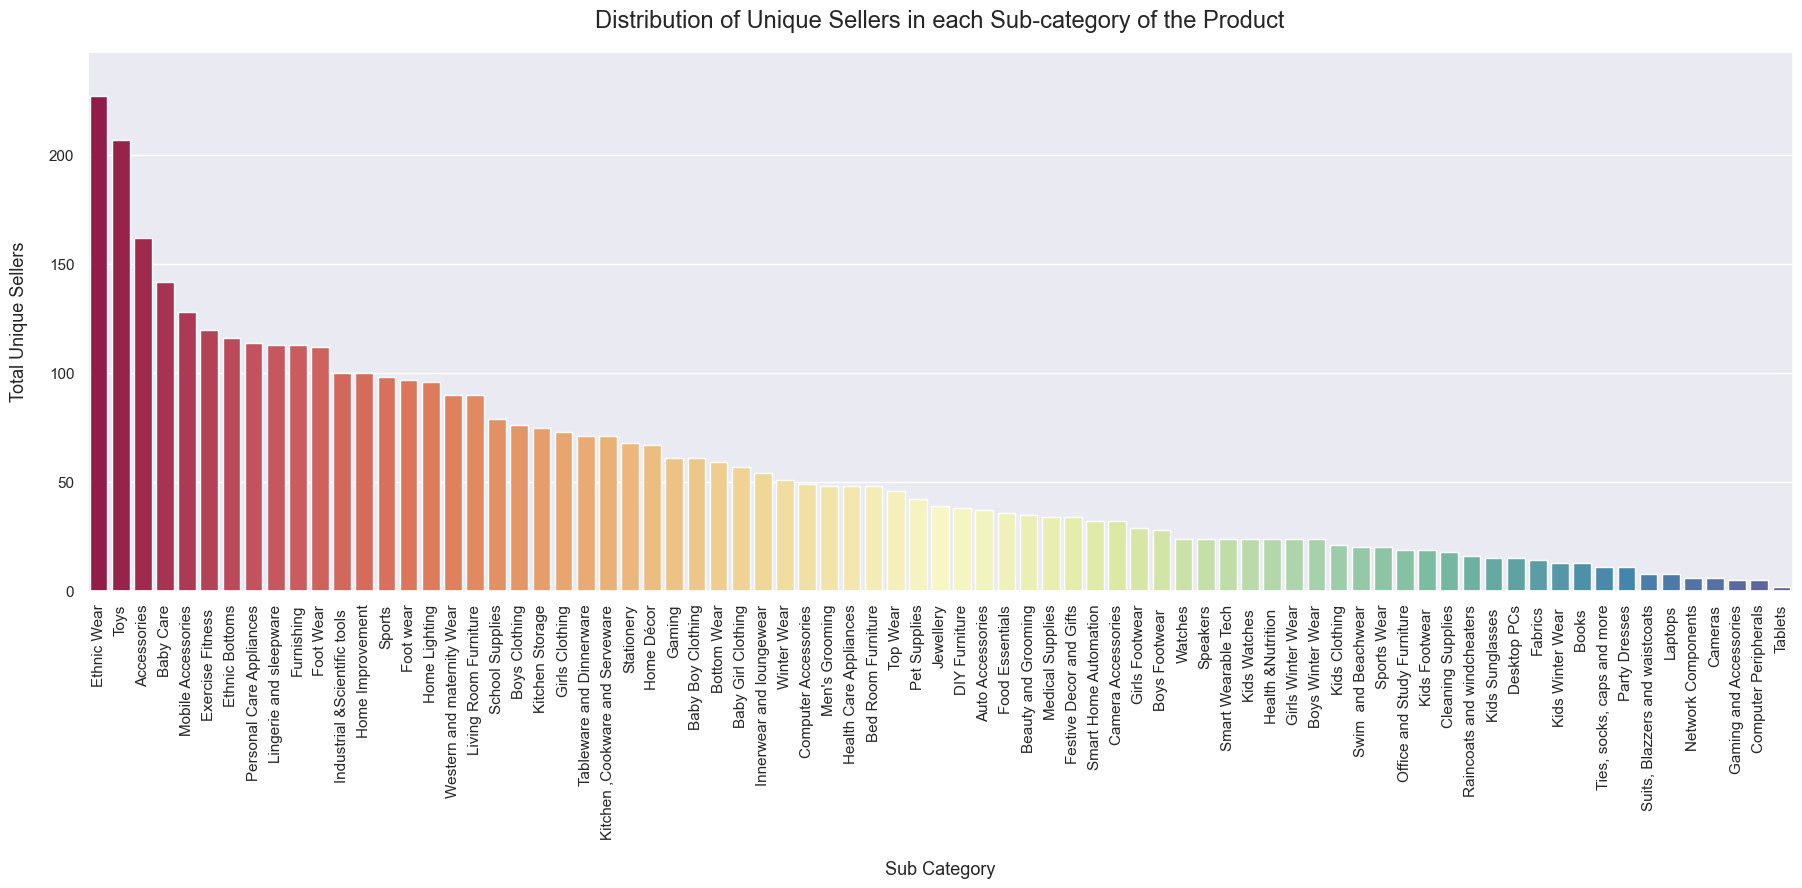

In [80]:
# Visualize the distribution of unique sellers in each subcategory of the product
ax = sns.barplot(x ='sub_category', y='unique_sellers', data=df_cat2_unique_sellers, ci=None, palette="Spectral")
ax.set_title("Distribution of Unique Sellers in each Sub-category of the Product", fontdict={'size':17}, y=1.03)
plt.xticks(rotation=90)
ax.set_ylabel('Total Unique Sellers', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Sub Category', labelpad=15, fontdict={'size':13})
plt.show()

#### Conclusion:
* Total unique sellers range from 2 to 227.
* In the product sub-category, ethnic wear has the most unique sellers around 227, followed by toys and footwear.
